In this project, we shall be analysisng and attempting to predict livestock prices using various statistical techniques and machine learning models. 

In [1]:
# importing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the file 

In [2]:
#load the excel file as a dataframe
df = pd.read_excel('Makert Prices 2022.xlsx')
# first five rows
df.head()

Dates  Seasons          Bull          Cow        Heifer         Steer
0 2009-08-01  Drought   8500.000000   966.666667   1666.666667    766.666667
1 2009-09-01  Drought  18000.000000  4000.000000  15000.000000  13000.000000
2 2009-10-01  Drought   8500.000000  5000.000000   8000.000000   9000.000000
3 2009-11-01  Drought  12484.312740  4815.021851   5198.550137  11302.715033
4 2009-12-01      Wet  22166.666667  9477.777778  10111.111111  18222.222222

In [3]:
print(df.columns)

Index(['Dates', 'Seasons', 'Bull', 'Cow', 'Heifer', 'Steer'], dtype='object')


# Data Wrangling

In [4]:
# Basic metadata of the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Dates    154 non-null    datetime64[ns]
 1   Seasons  154 non-null    object        
 2   Bull     154 non-null    float64       
 3   Cow      154 non-null    float64       
 4   Heifer   154 non-null    float64       
 5   Steer    154 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 7.3+ KB


### Completeness 

Here we check for missing values or null values

In [5]:
df.isna().any()

Dates      False
Seasons    False
Bull       False
Cow        False
Heifer     False
Steer      False
dtype: bool

In [6]:
df.isnull().sum()

Dates      0
Seasons    0
Bull       0
Cow        0
Heifer     0
Steer      0
dtype: int64

### Consistency

In [7]:
#checking for duplicates

f'There are {df.duplicated().sum()} duplicates in the dataframe'

'There are 0 duplicates in the dataframe'

### Validity

In [8]:
df['Seasons'].value_counts()

Seasons
Wet        50
Dry        50
dry        24
Drought    13
drought    12
wet         5
Name: count, dtype: int64

The `Dry` and `dry` seasons seem to be similar as well as the `Drought` and `drought` seasons and the `wet` and `Wet` seasons. So lets make them all the same by having them be Proper titles

In [9]:
df.Seasons = df.Seasons.str.title()
df['Seasons'].value_counts()

Seasons
Dry        74
Wet        55
Drought    25
Name: count, dtype: int64

Now we have 3 seasons
* Dry
* Wet
* Drought

#### Outliers

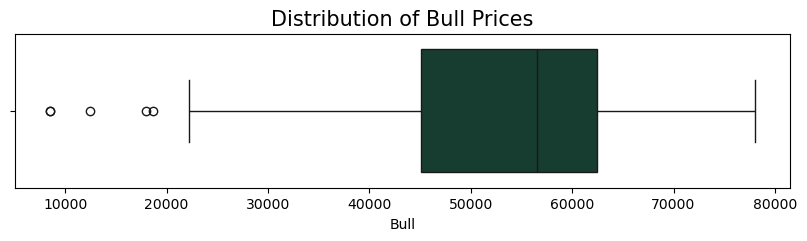

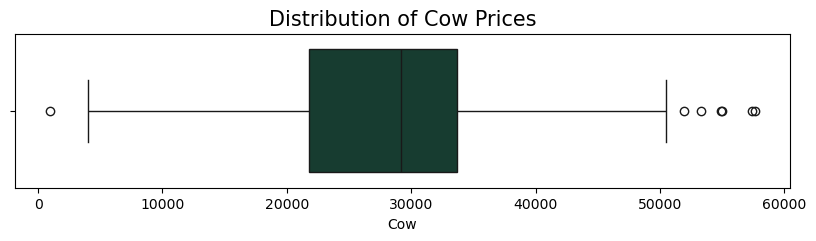

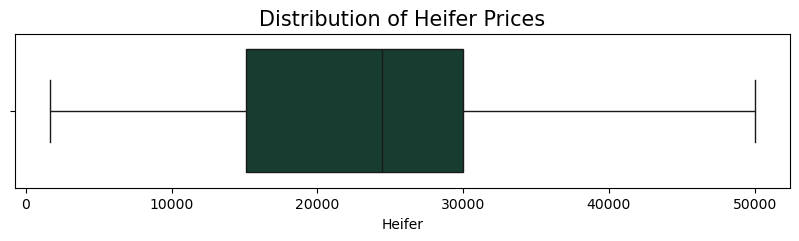

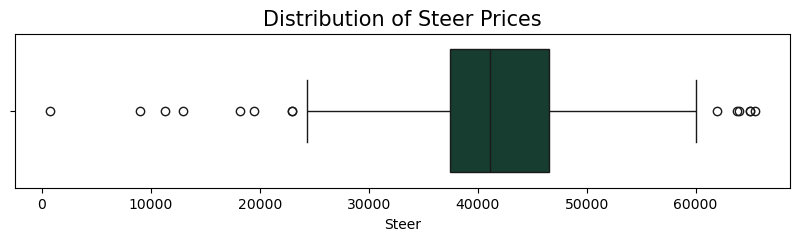

In [10]:
#Checking for outliers
def outliers(df, col):
    """
    This function visualises the outliers and outputs boxplots
    """
    plt.figure(figsize=(10,2))
    sns.boxplot(x=col, data=df, color= "#114232")
    plt.title(f'Distribution of {col} Prices', fontsize=15);

num_list=['Bull', 'Cow','Heifer', 'Steer']
for col in num_list:
    outliers(df,col)

There are some outliers but this is normal since the market shifts depending on the season, so will leave them.

Let us also change the datatype of the `Seasons` column to `Category` as it was an object before.

In [11]:
df['Seasons']= df['Seasons'].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Dates    154 non-null    datetime64[ns]
 1   Seasons  154 non-null    category      
 2   Bull     154 non-null    float64       
 3   Cow      154 non-null    float64       
 4   Heifer   154 non-null    float64       
 5   Steer    154 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(4)
memory usage: 6.4 KB


In [19]:
df['Month'] = df['Dates'].dt.month
# Add 'Month' column
df['Month'] = df['Dates'].dt.month

# Define a lambda function to map month numbers to month names
month_map = lambda x: pd.Timestamp(year=2000, month=x, day=1).strftime('%B')

# Apply the lambda function to 'Month' column
df['Month'] = df['Month'].apply(month_map)


In [20]:
df['Month'].value_counts()

Month
August       13
September    13
October      13
November     13
December     13
January      13
March        13
April        13
May          13
July         13
February     12
June         12
Name: count, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Dates    154 non-null    datetime64[ns]
 1   Seasons  154 non-null    category      
 2   Bull     154 non-null    float64       
 3   Cow      154 non-null    float64       
 4   Heifer   154 non-null    float64       
 5   Steer    154 non-null    float64       
 6   Month    154 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(4), object(1)
memory usage: 7.6+ KB


In [22]:
# Basic description of numerical features

df.describe().T

count                           mean                  min  \
Dates     154  2015-12-17 21:30:23.376623360  2009-08-01 00:00:00   
Bull    154.0                   53296.236208               8500.0   
Cow     154.0                   28102.985031           966.666667   
Heifer  154.0                   23831.001561          1666.666667   
Steer   154.0                    41550.11114           766.666667   

                        25%                  50%                  75%  \
Dates   2012-10-08 18:00:00  2015-12-16 12:00:00  2019-02-22 00:00:00   
Bull                45100.0         56503.850527          62417.57515   
Cow            21780.739223         29150.409072         33659.749804   
Heifer         15083.333333         24461.740493         29975.666924   
Steer          37421.703386         41150.249088         46531.278194   

                        max           std  
Dates   2022-07-29 00:00:00           NaN  
Bull                78000.0  13837.139183  
Cow             57613.00104   9973.969461  
Heifer              50000.0  10485.280024  
Steer          65411.537154  10678.454015

The mean, minimum and maximum prices as well as quartile prices and dates are given above. Bulls seem to be the best animals to keep/ rear  in terms of pricing.

## Exploratory Data Analysis

### Lets do some Analysis

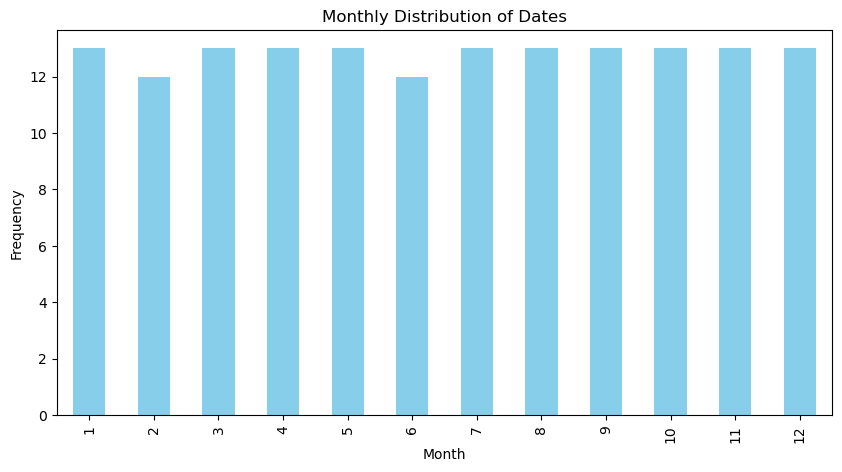

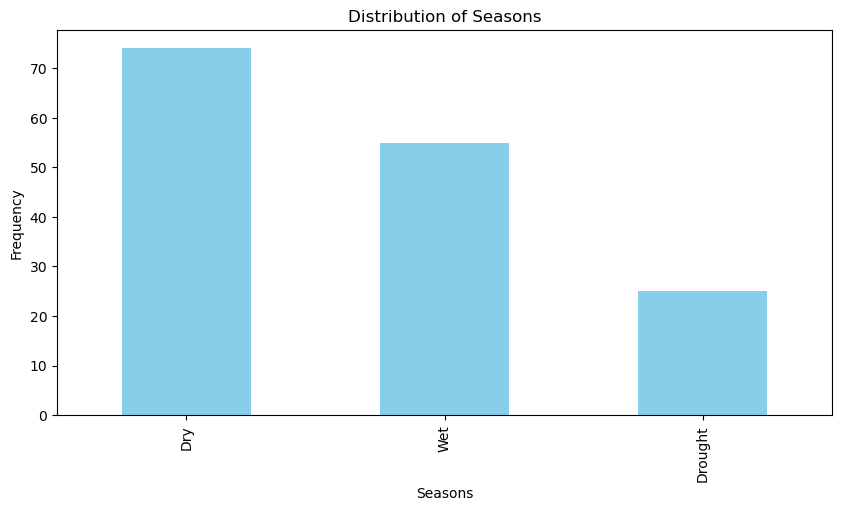

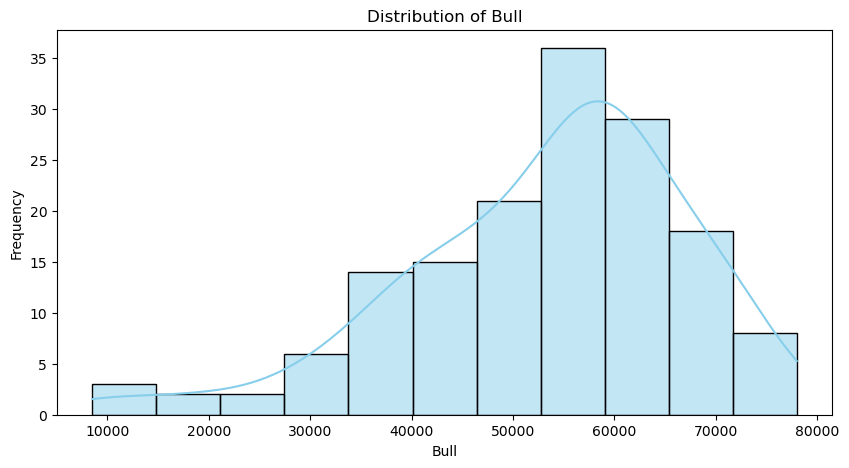

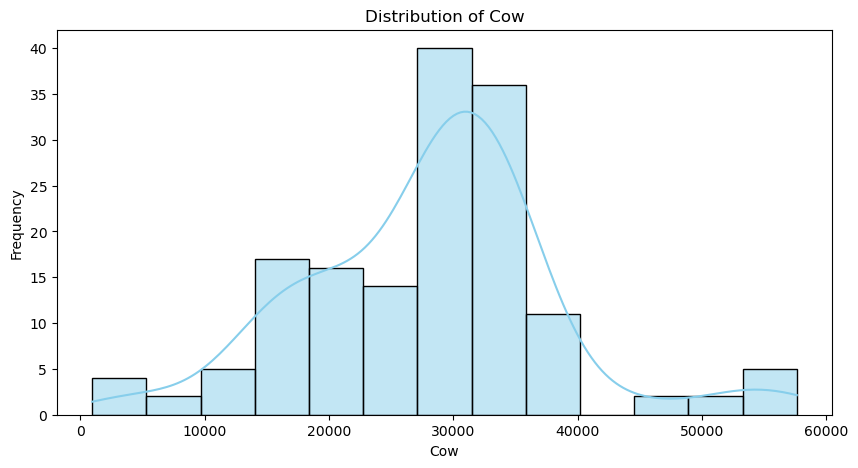

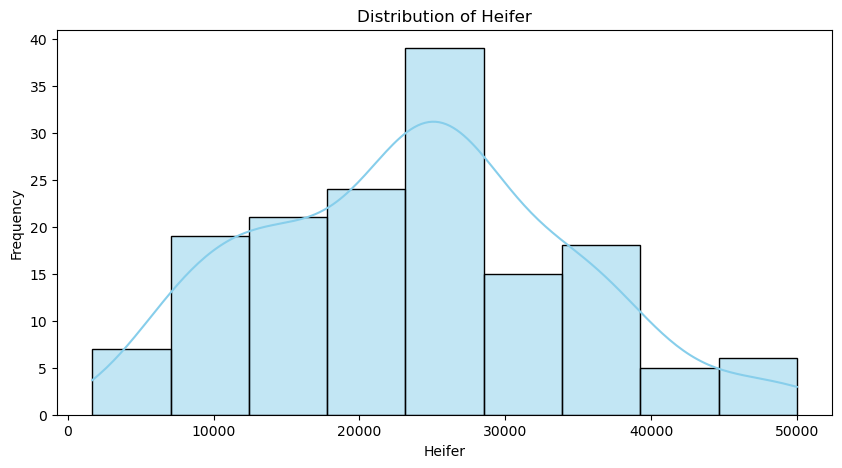

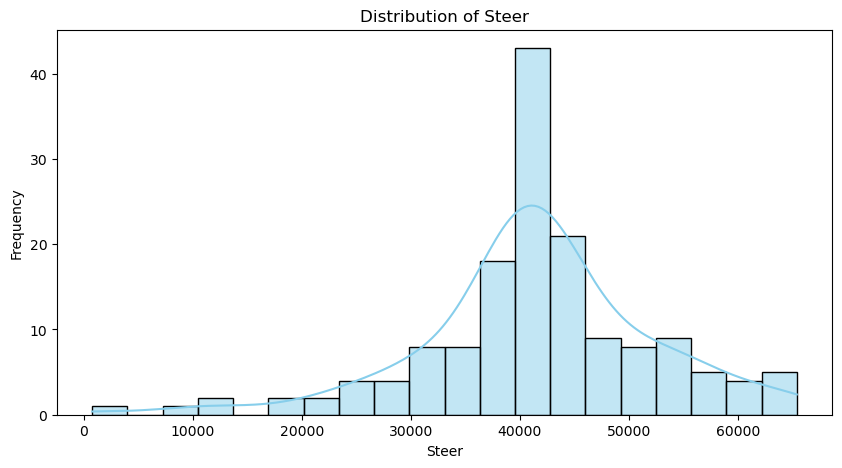

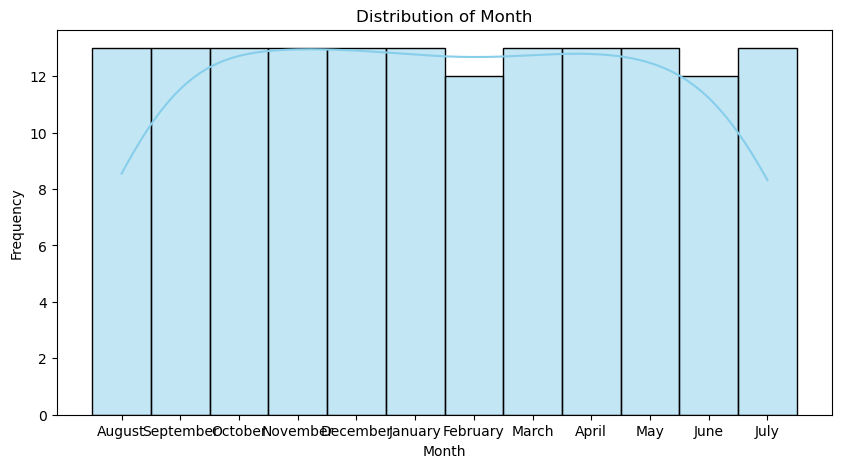

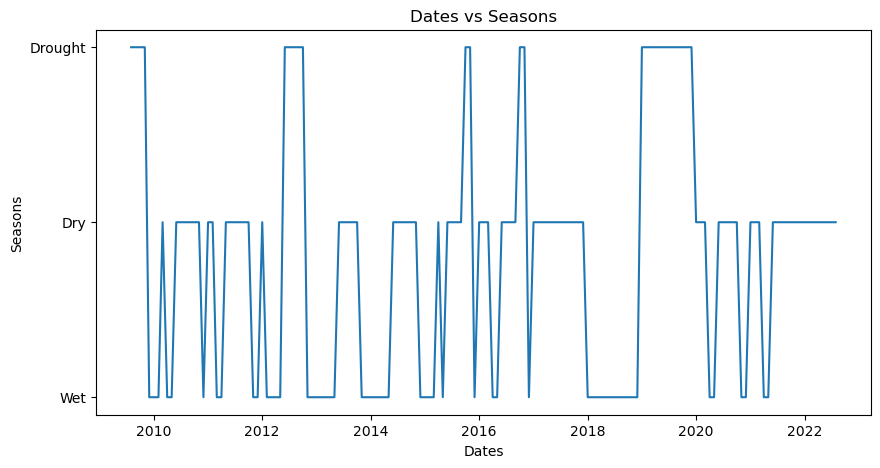

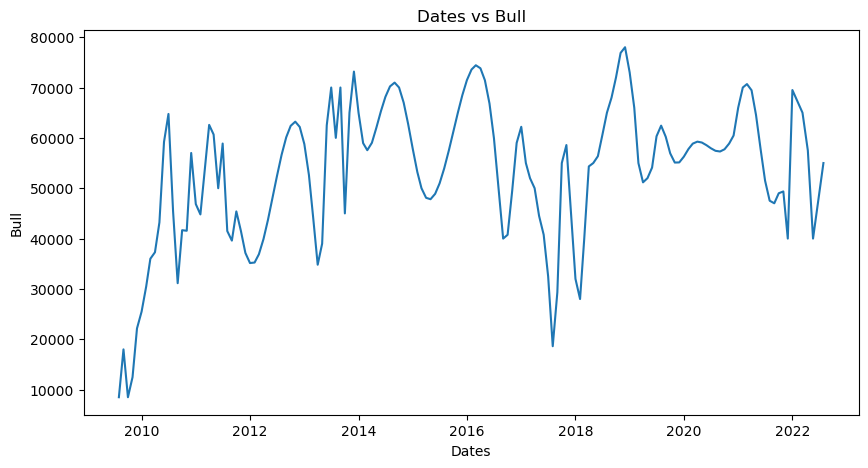

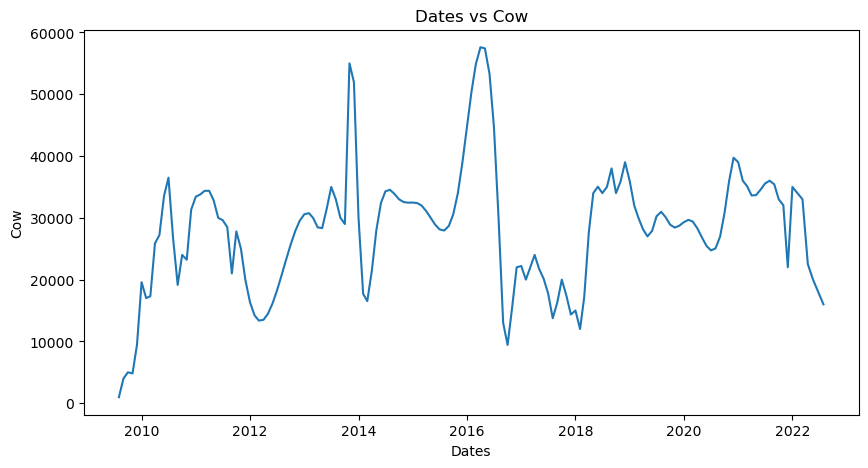

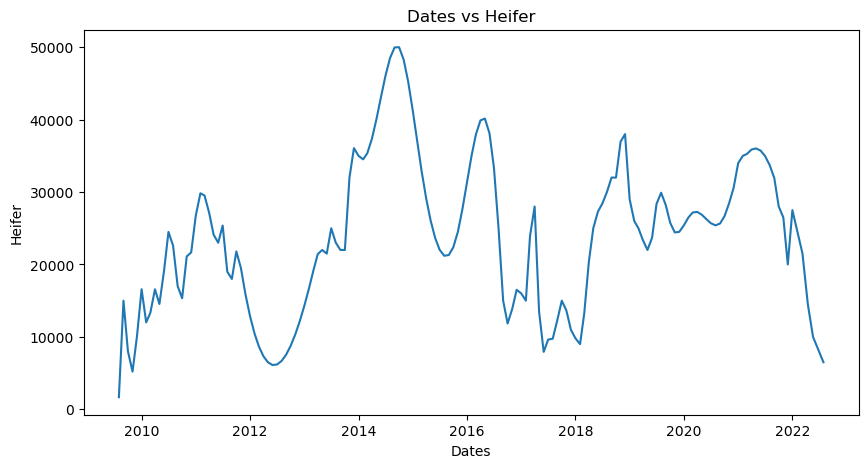

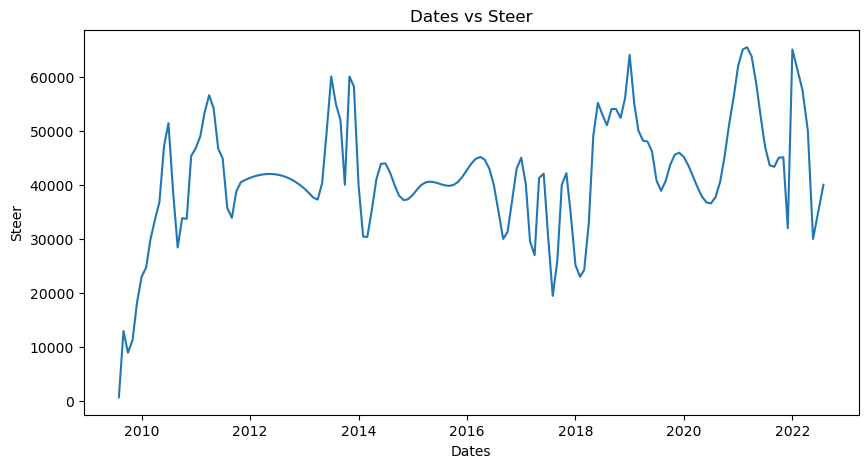

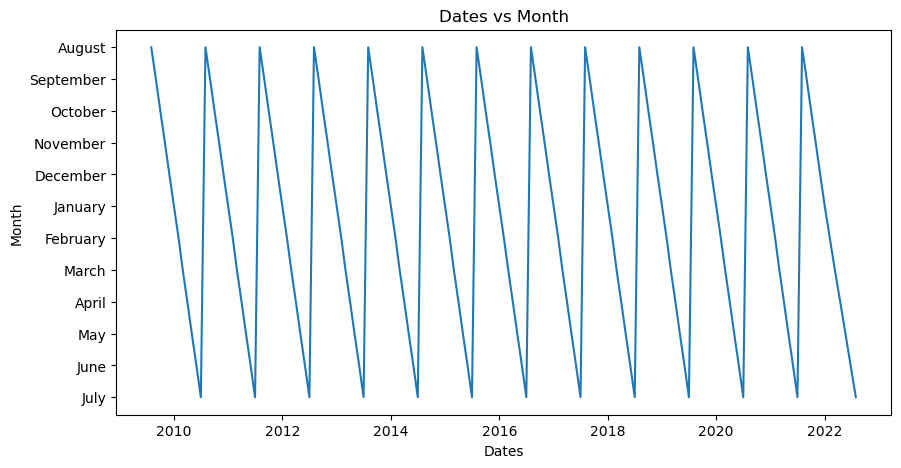

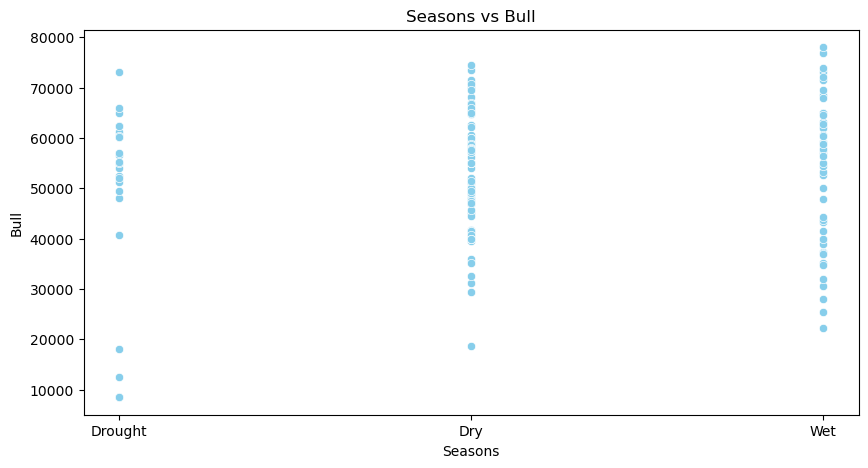

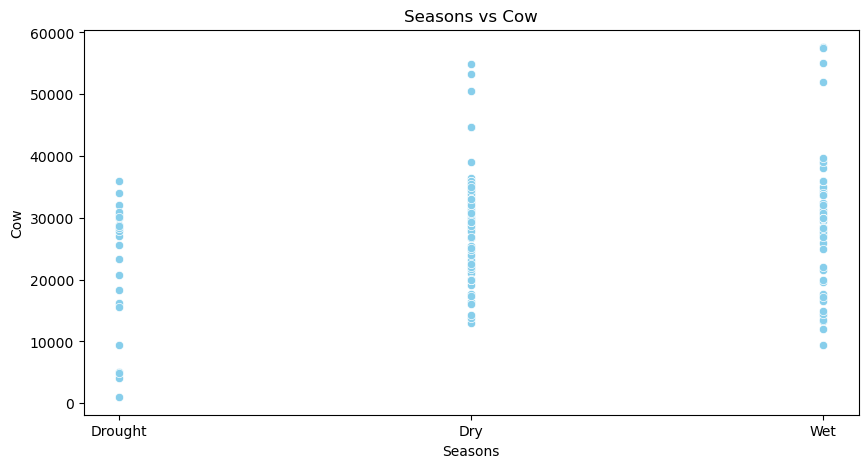

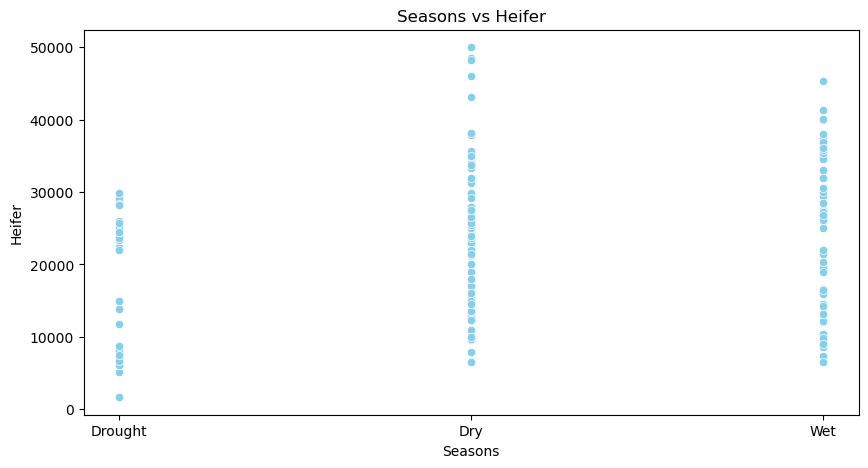

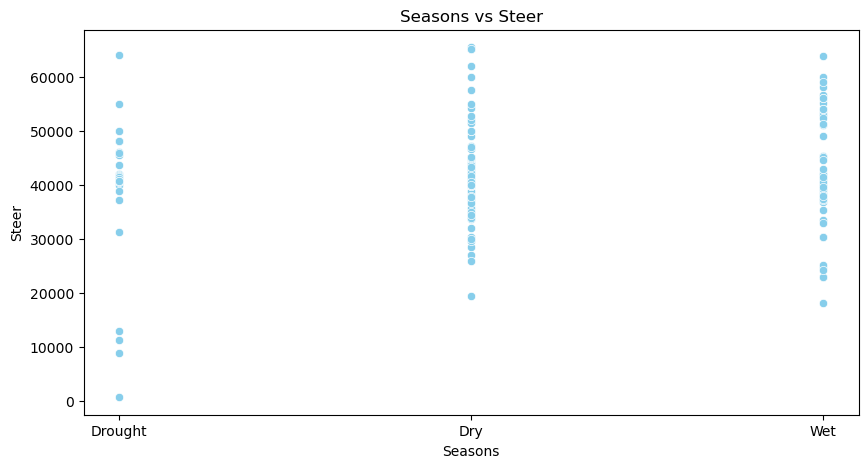

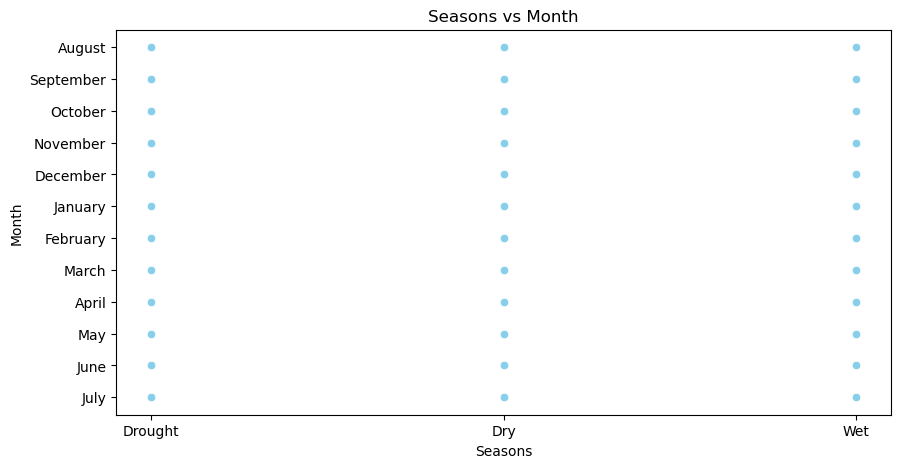

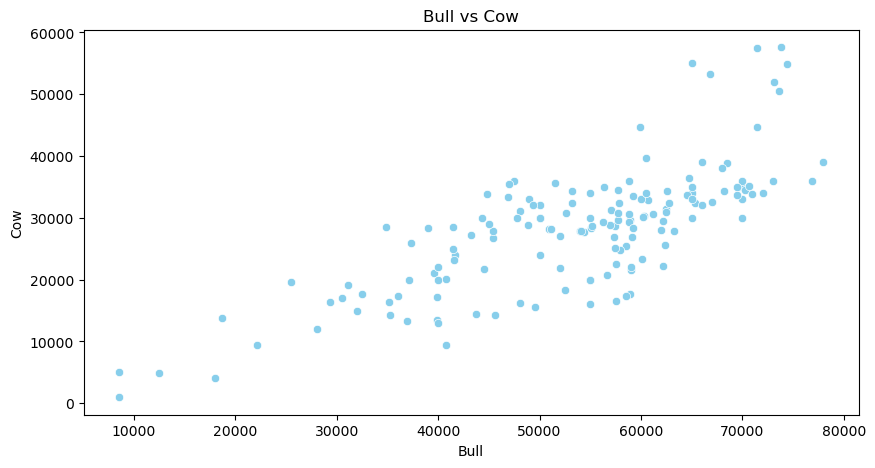

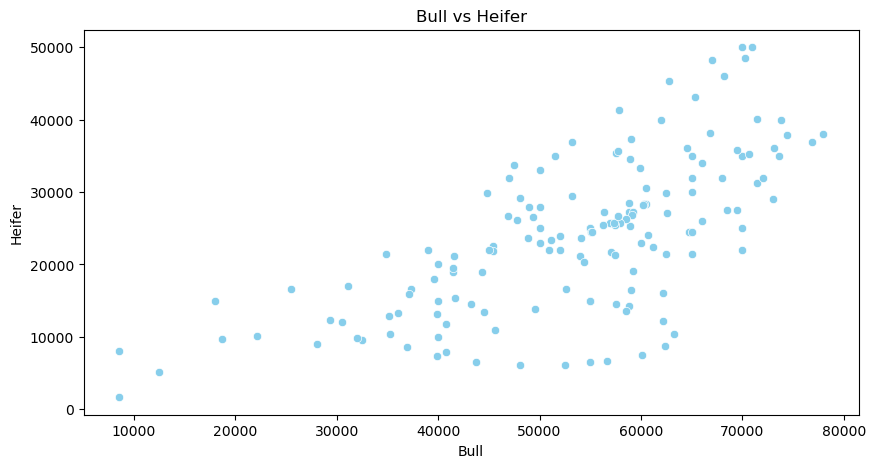

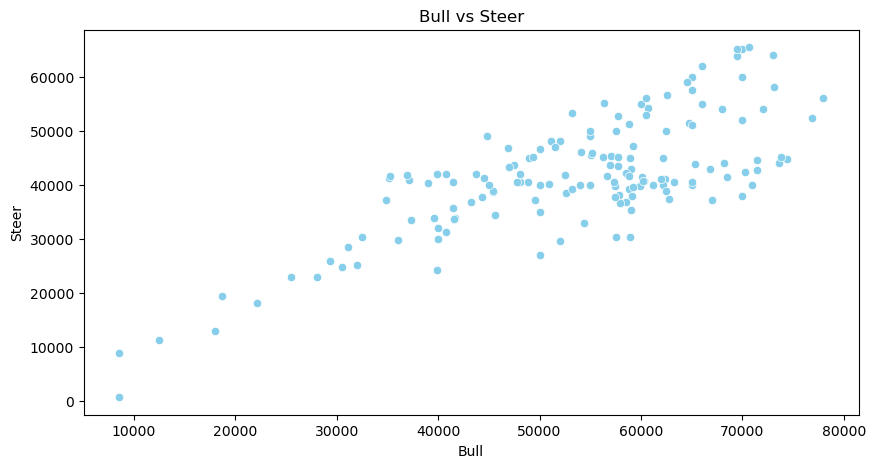

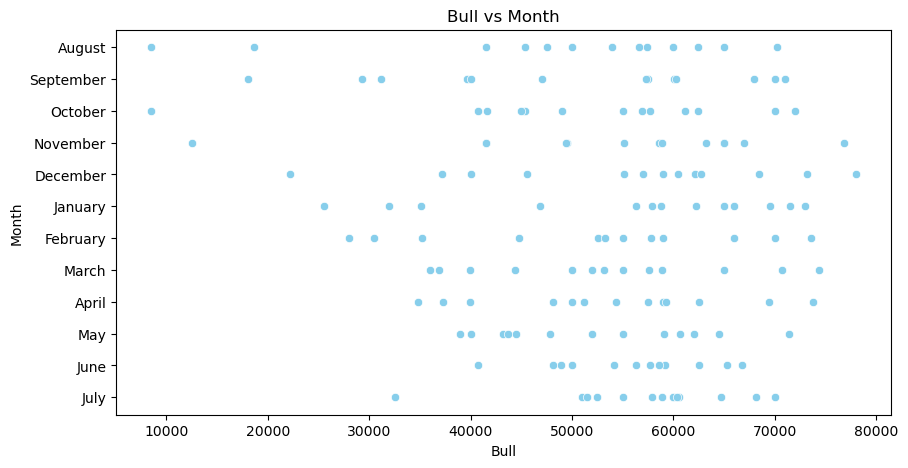

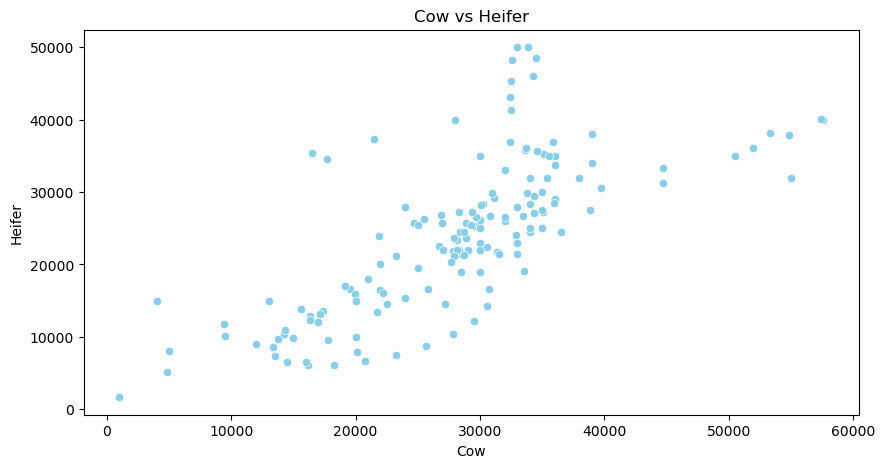

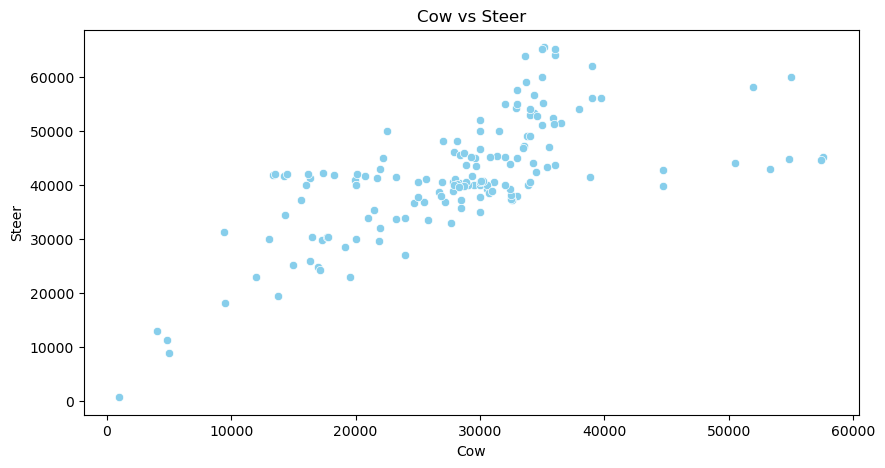

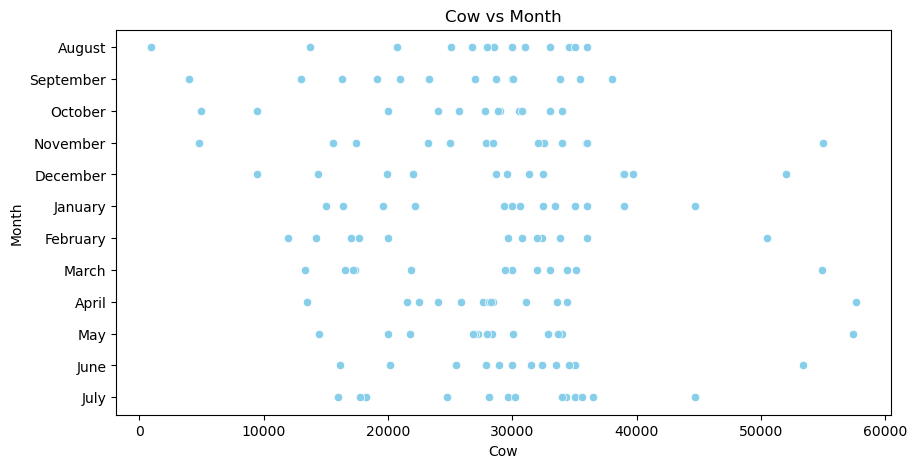

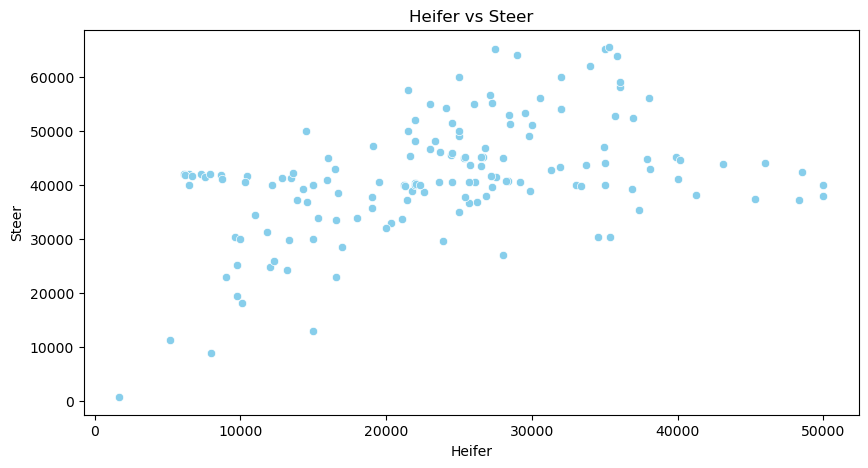

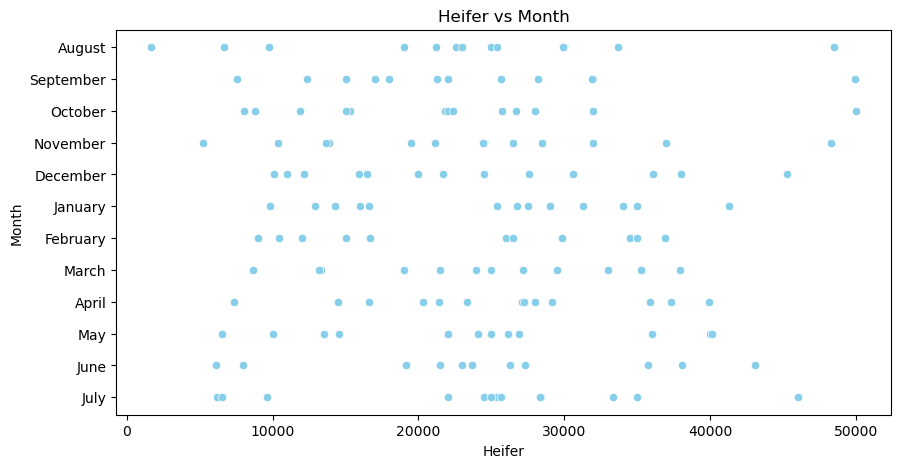

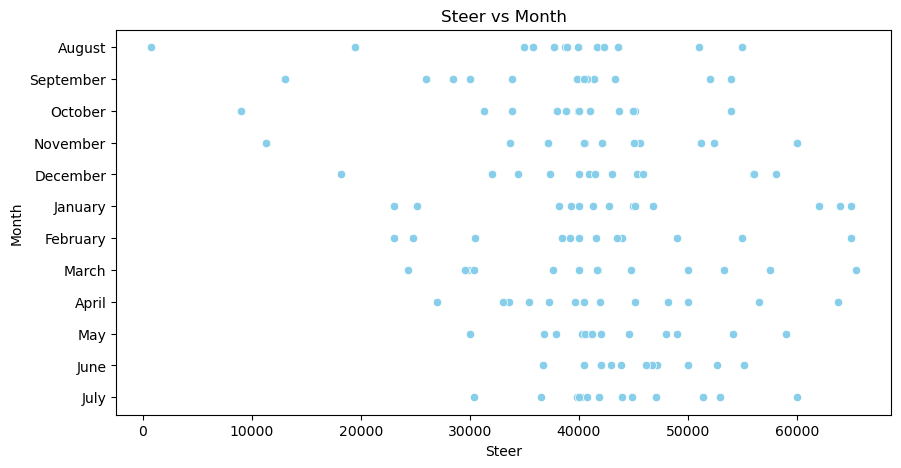

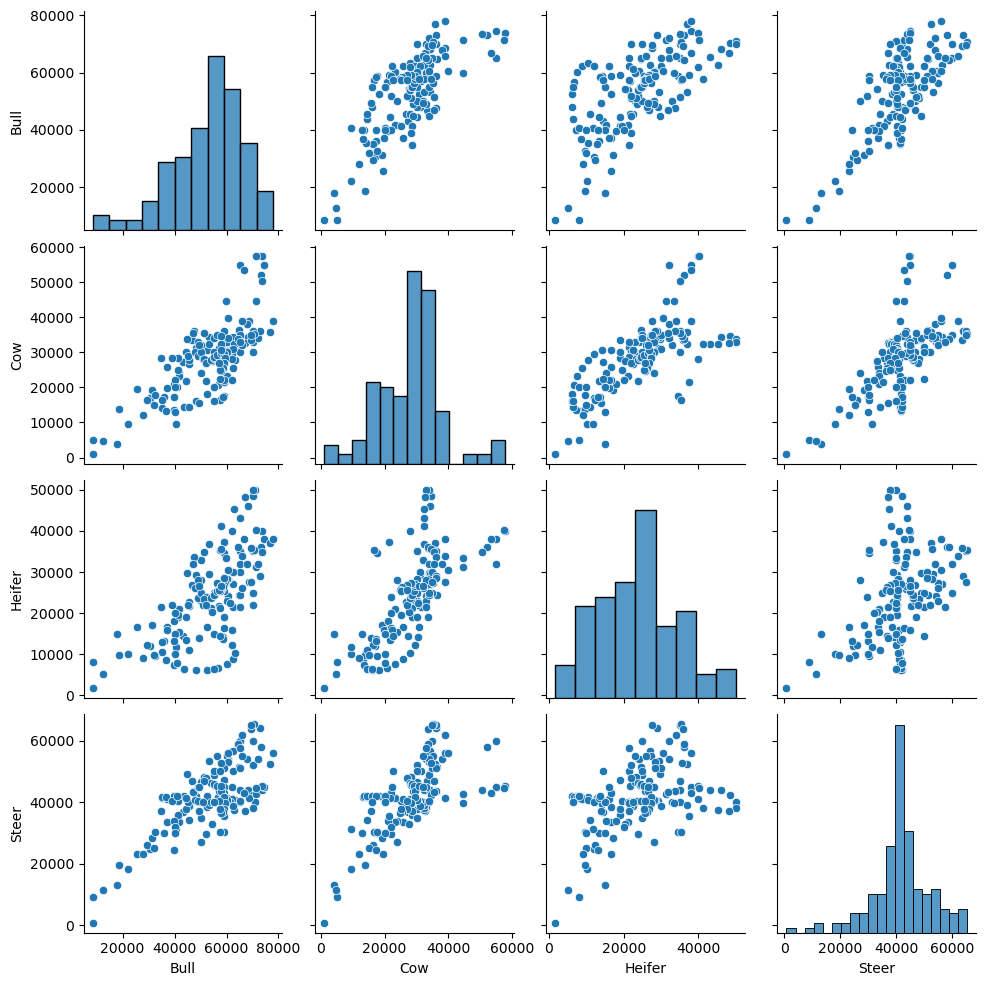

In [23]:
def analyze_dataset(data):
    # Univariate Analysis
    def univariate_analysis(column):
        plt.figure(figsize=(10, 5))
        if data[column].dtype == 'datetime64[ns]':
            data[column].dt.month.value_counts().sort_index().plot(kind='bar', color='skyblue')
            plt.title('Monthly Distribution of ' + column)
            plt.xlabel('Month')
            plt.ylabel('Frequency')
        elif data[column].dtype.name == 'category':
            data[column].value_counts().plot(kind='bar', color='skyblue')
            plt.title('Distribution of ' + column)
            plt.xlabel(column)
            plt.ylabel('Frequency')
        else:
            sns.histplot(data[column], kde=True, color='skyblue')
            plt.title('Distribution of ' + column)
            plt.xlabel(column)
            plt.ylabel('Frequency')
        plt.show()

    # Bivariate Analysis
    def bivariate_analysis(x, y):
        plt.figure(figsize=(10, 5))
        if data[x].dtype == 'datetime64[ns]':
            sns.lineplot(data=data, x=x, y=y)
            plt.title('{} vs {}'.format(x, y))
        elif data[x].dtype.name == 'category' and data[y].dtype.name == 'category':
            sns.heatmap(pd.crosstab(data[x], data[y]), annot=True, cmap='coolwarm')
            plt.title('{} vs {}'.format(x, y))
        else:
            sns.scatterplot(data=data, x=x, y=y, color='skyblue')
            plt.title('{} vs {}'.format(x, y))
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()

    # Multivariate Analysis
    def multivariate_analysis(columns):
        sns.pairplot(data[columns])
        plt.show()

    # Call functions for analysis
    for column in data.columns:
        univariate_analysis(column)

    for i in range(len(data.columns)):
        for j in range(i+1, len(data.columns)):
            bivariate_analysis(data.columns[i], data.columns[j])

    multivariate_analysis(data.columns)

# Example usage:
analyze_dataset(df)


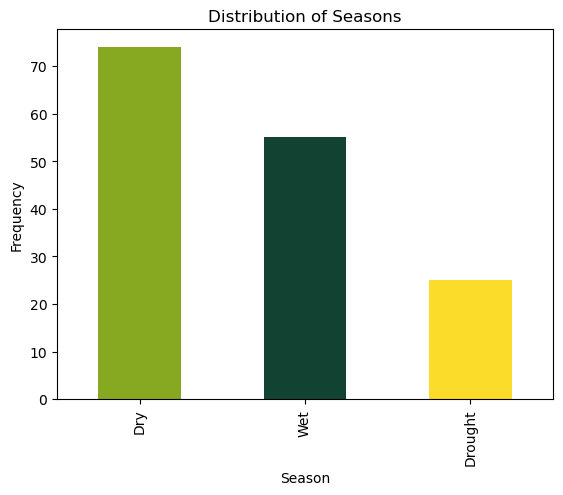

In [24]:
colors = ['#87A922', '#114232', '#FCDC2A']

df['Seasons'].value_counts().plot(kind='bar', color=colors)
plt.title('Distribution of Seasons')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.show()


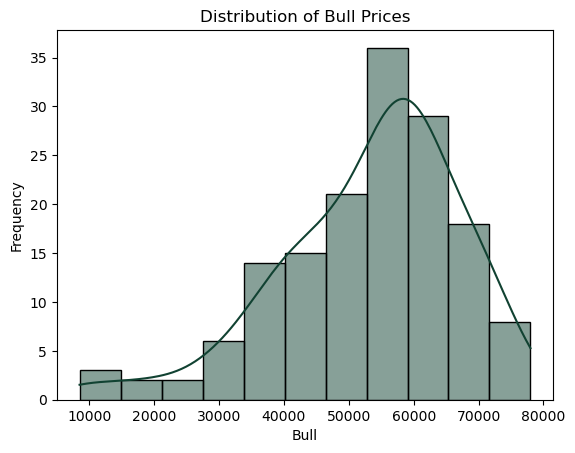

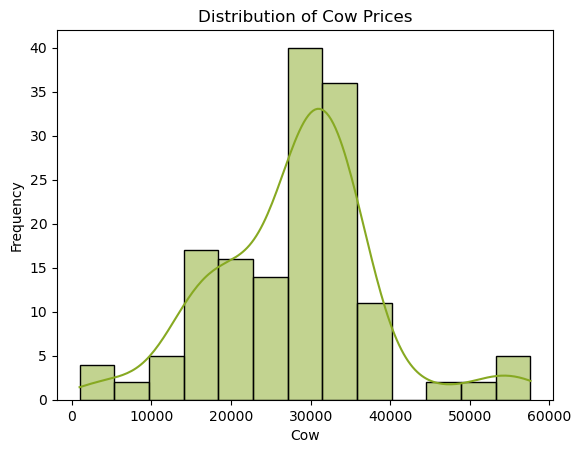

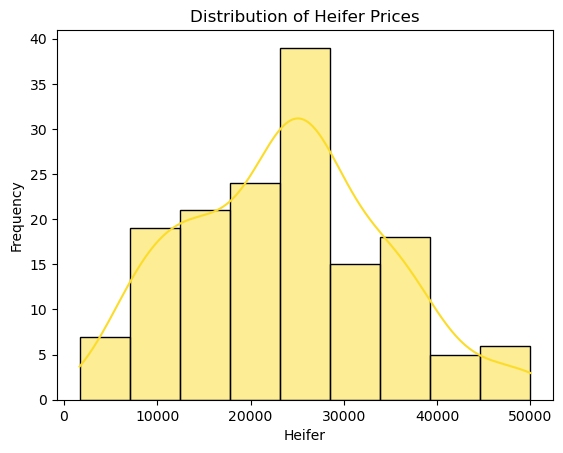

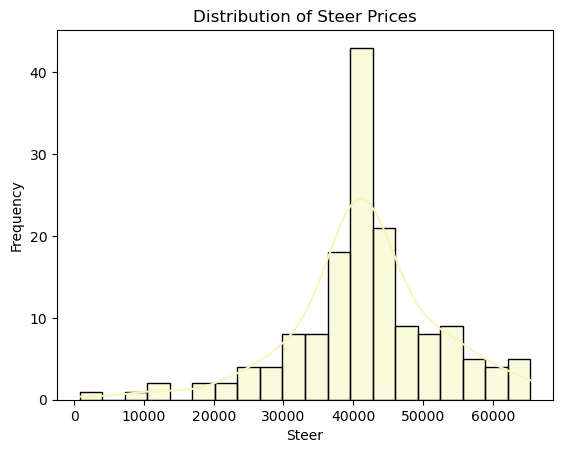

In [25]:
# Define colors for the histograms
colors = ['#114232', '#87A922', '#FCDC2A', '#F7F6BB']

# Loop through each column starting from the fourth column
for column, color in zip(df.columns[2:], colors):
    # Create histogram
    sns.histplot(df[column], kde=True, color=color)
    
    # Set title, x-label, y-label
    plt.title(f'Distribution of {column} Prices')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Show the plot for this column
    plt.show()


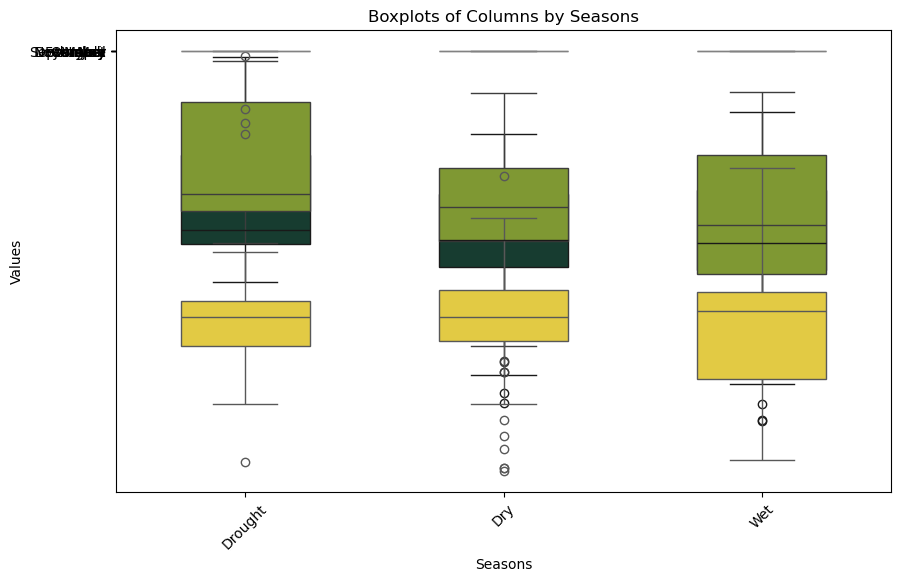

In [26]:
# Define colors as a list
colors = ['#114232', '#87A922', '#FCDC2A', '#F7F6BB']

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Loop through each column starting from the fourth column
for i, column in enumerate(df.columns[3:]):
    # Create boxplot
    sns.boxplot(x='Seasons', y=column, data=df, color=colors[i % len(colors)], width=0.5)
    
# Set title, x-label, y-label
plt.title('Boxplots of Columns by Seasons')
plt.xlabel('Seasons')
plt.ylabel('Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


<Axes: xlabel='Seasons', ylabel='Bull'>

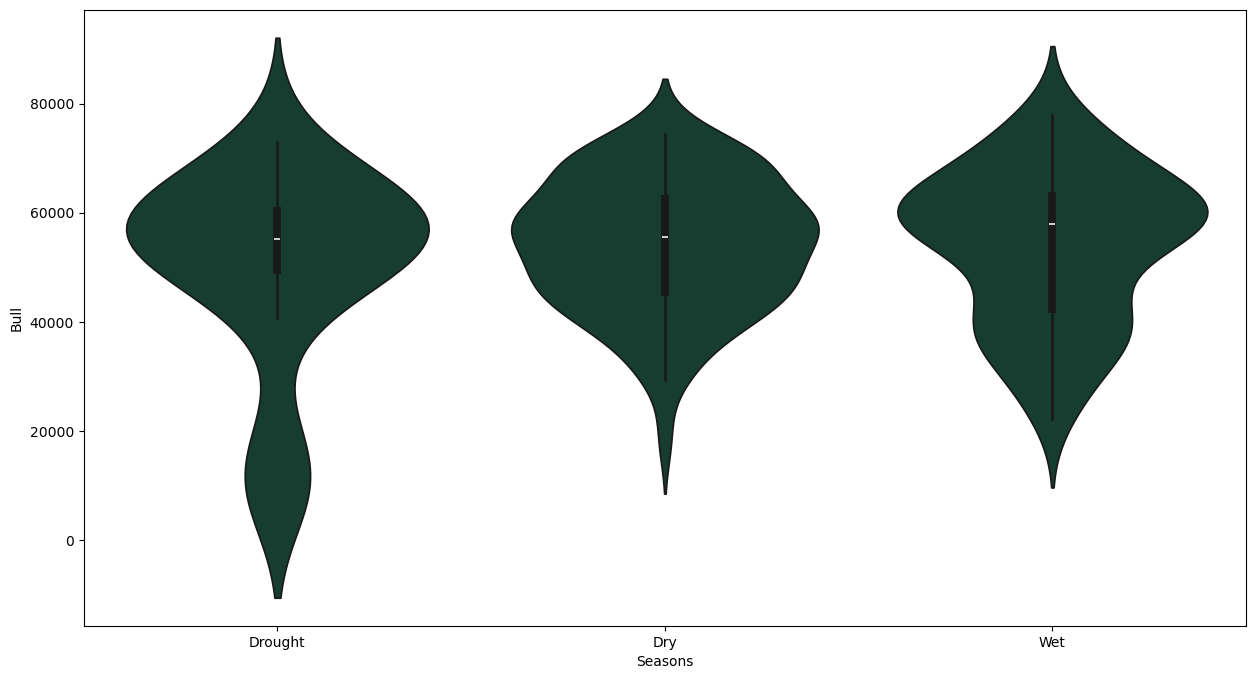

In [18]:

plt.figure(figsize=(15,8))
sns.violinplot(x= 'Seasons' , y = 'Bull', data = df, hue_order=df.Seasons.value_counts(), color='#114232' )

* The average price in the seasons seems to be between 5000 and 6000

* Prices have a relatively low volatility during the  Seasons

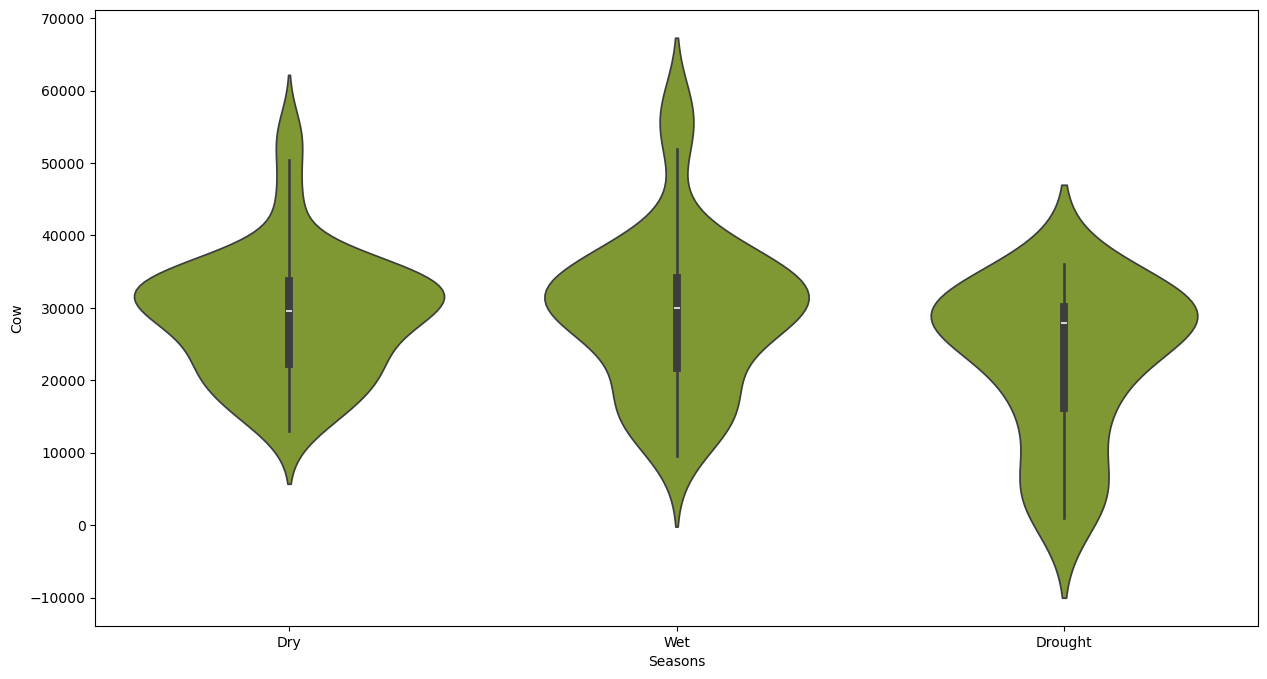

In [28]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='Seasons', y='Cow', data=df, order=df['Seasons'].value_counts().index, color= '#87A922',)
plt.show()


* The average price in the seasons seems to be between 2000 and 4000

* Prices have a relatively high volatility during the Drought and go towards the lower side and some seem to die?

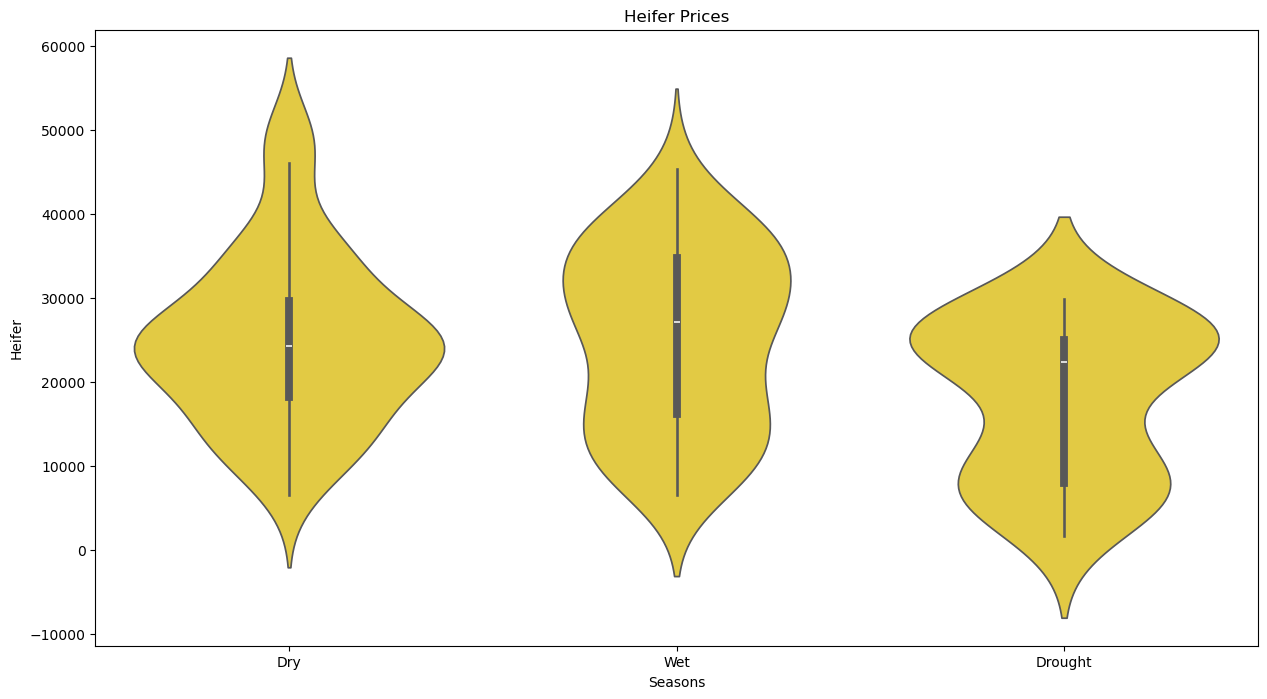

In [30]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='Seasons', y='Heifer', data=df, order=df['Seasons'].value_counts().index, color='#FCDC2A' )
plt.title('Heifer Prices')
plt.show()


The Heifer average prices are the best during the Wet Seaoson selling at 35000 on average and 25000 on average during the drought, similar to the Dry season. 

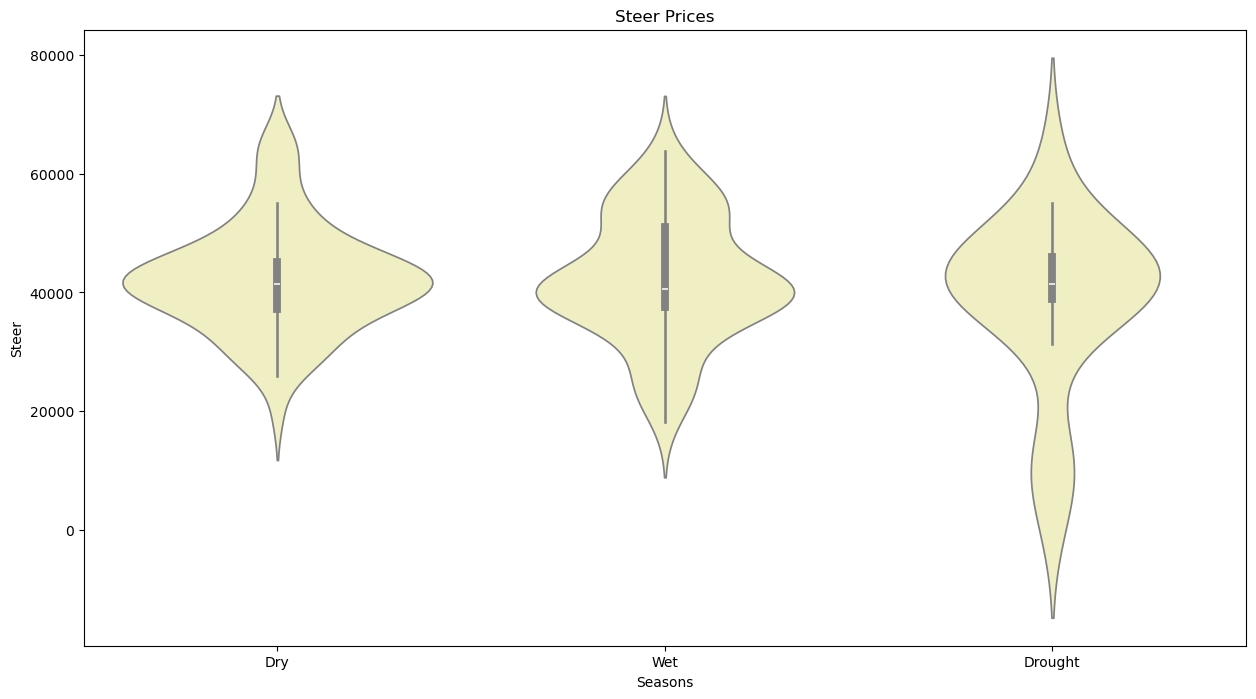

In [31]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='Seasons', y='Steer', data=df, order=df['Seasons'].value_counts().index, color= '#F7F6BB' )
plt.title('Steer Prices')
plt.show()

The prices are affected the most during the Drought with some probably dying due to the drought and the young age of the livestock

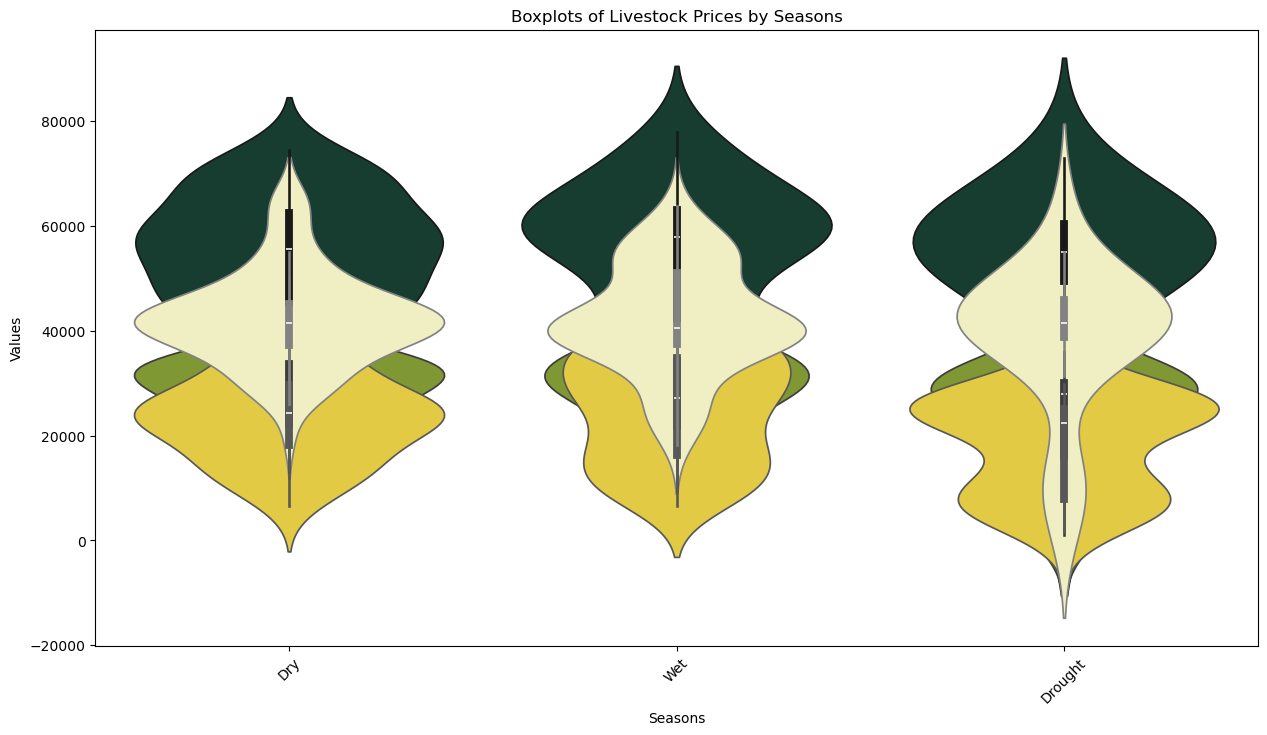

In [23]:


# Set the size of the plot
plt.figure(figsize=(15, 8))

# Define colors as a list
colors = ['#114232', '#87A922', '#FCDC2A', '#F7F6BB']

# Loop through each column in the list
for i, column in enumerate(df.columns[2:]):
    # Create boxplot
    sns.violinplot(x='Seasons', y=column, data=df, order=df['Seasons'].value_counts().index, color=colors[i % len(colors)])
    
# Set title, x-label, y-label
plt.title('Boxplots of Livestock Prices by Seasons')
plt.xlabel('Seasons')
plt.ylabel('Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()



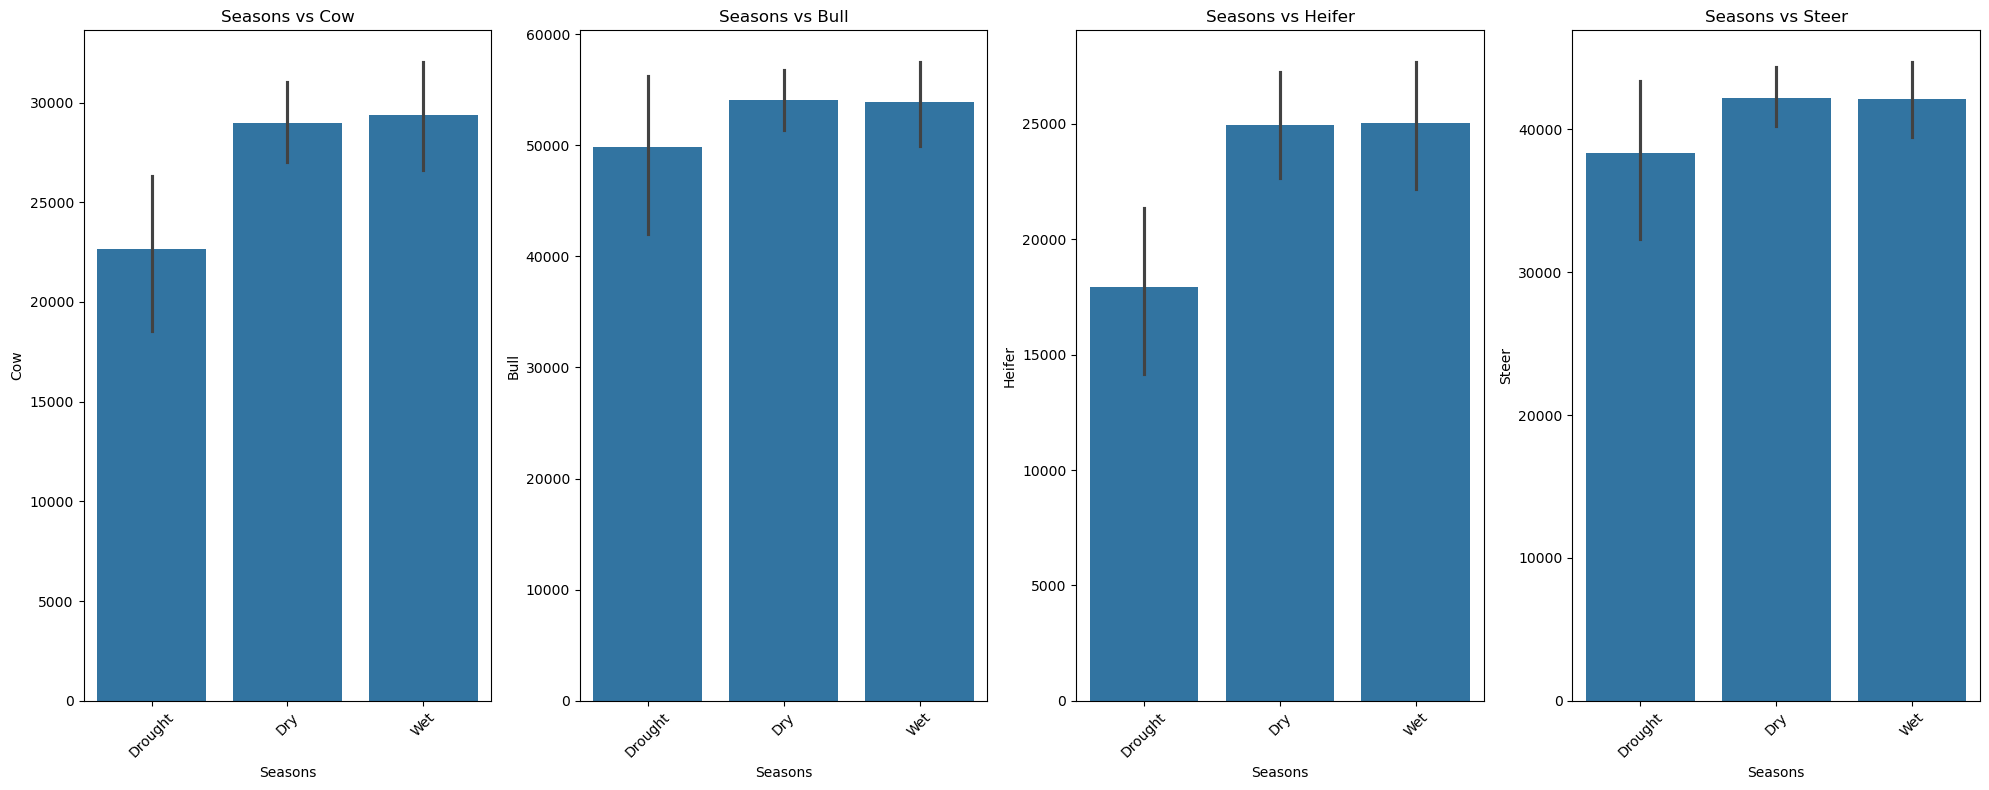

In [39]:

def plot_categorical_vs_numerical(df, categorical_column, numerical_columns):
    """
    Plot bar charts of numerical columns against a categorical column.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        categorical_column (str): The name of the categorical column.
        numerical_columns (list): The names of the numerical columns.
    """
    # Set the size of the plot
    plt.figure(figsize=(20, 8))

    # Loop through each numerical column
    for i, numerical_column in enumerate(numerical_columns, start=1):
        plt.subplot(1, len(numerical_columns), i)
        
        # Create the bar plot
        sns.barplot(x=categorical_column, y=numerical_column, data=df)
        
        # Set title and labels for each subplot
        plt.title(f'{categorical_column} vs {numerical_column}')
        plt.xlabel(categorical_column)
        plt.ylabel(numerical_column)

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

plot_categorical_vs_numerical(df, 'Seasons', ['Cow', 'Bull', 'Heifer','Steer' ])


Cow Prices are best during the wet season and worse during the Drought. For Bulls, Heifers and Steers, the prices during the Dry and wet seasons are relatively similar but very low during the drought
Bulls prices seem to be the least diverse throughout the seasons.

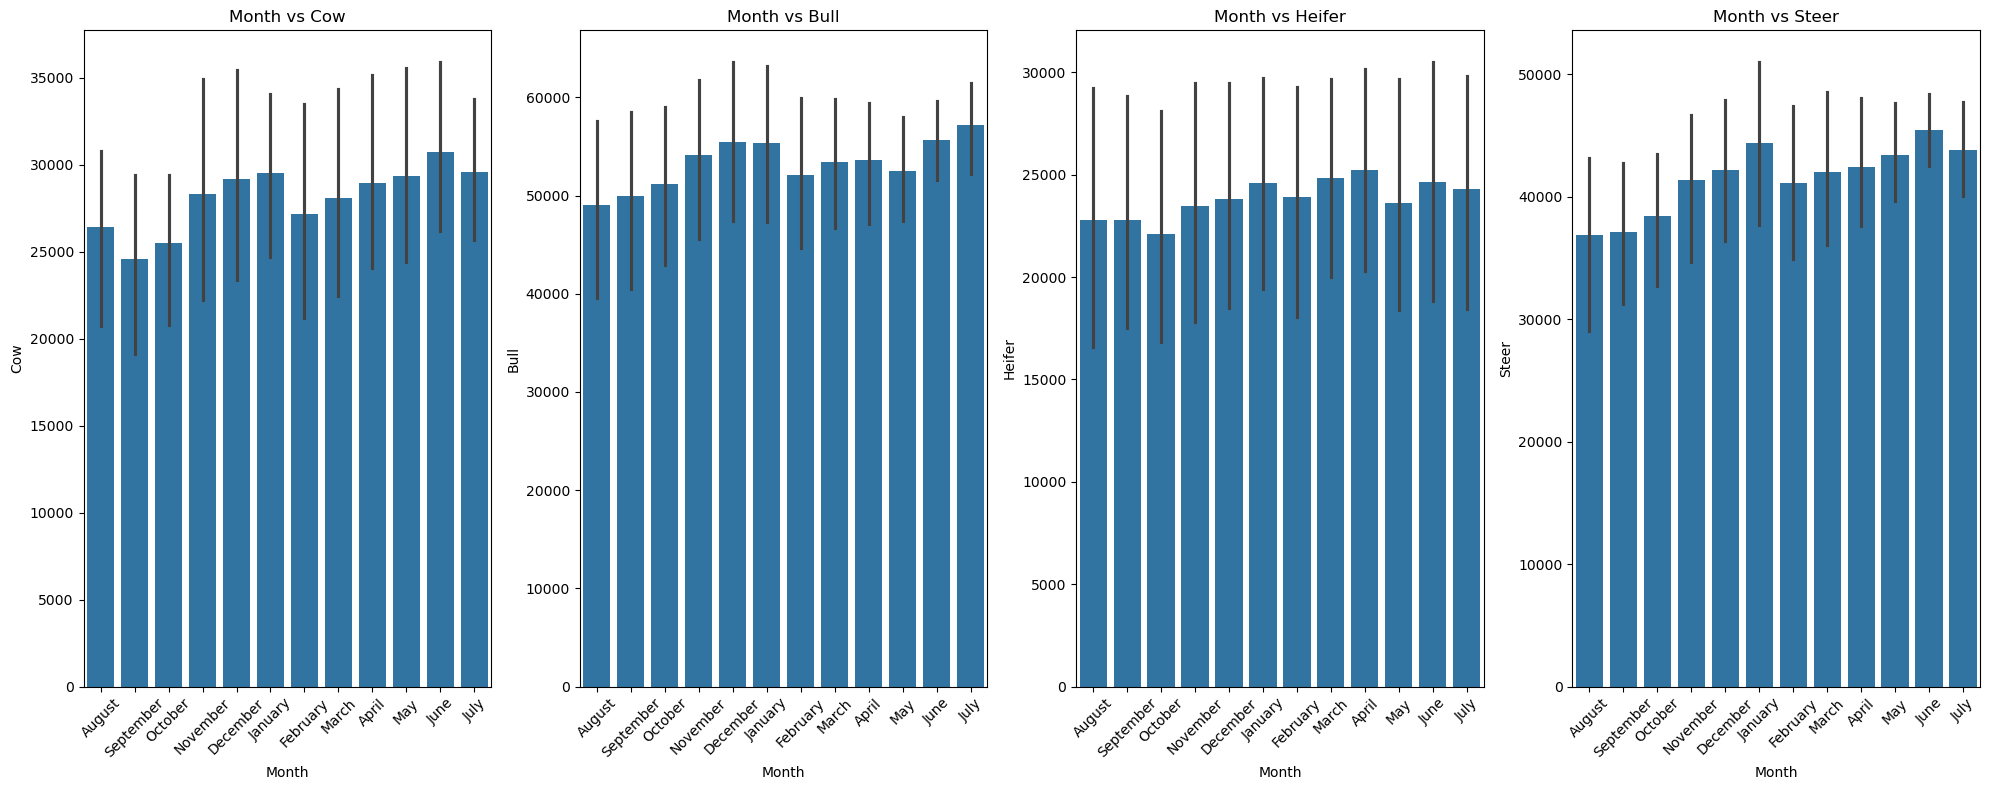

In [40]:
plot_categorical_vs_numerical(df, 'Month', ['Cow', 'Bull', 'Heifer','Steer' ])

The best prices for the livestock per month are as follows:
* Cows - June
* Bulls - July
* Heifers- April
* Steers - June

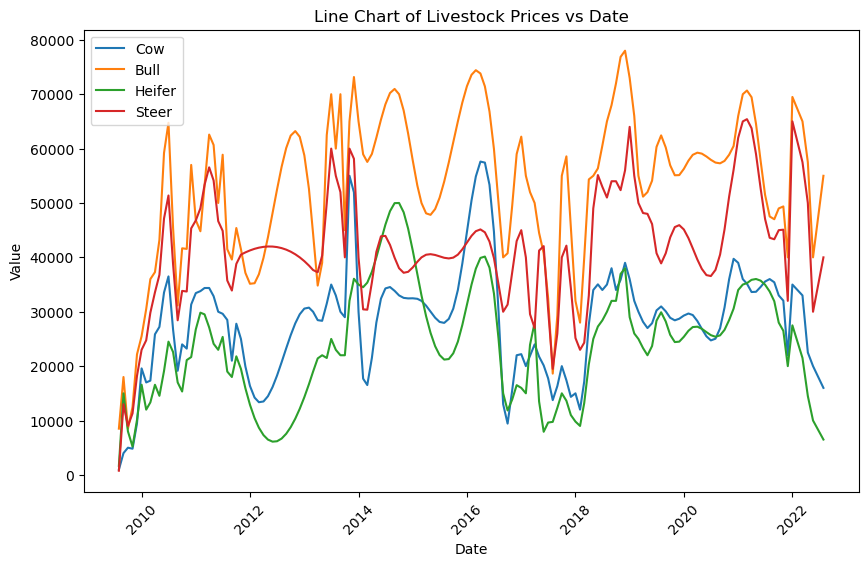

In [45]:
def line_chart_numerical_vs_date(df, date_column, numerical_columns):
    """
    Plot line chart of three numerical columns against dates.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        date_column (str): The name of the date column.
        numerical_columns (list): The names of the numerical columns.
    """
    # Set the size of the plot
    plt.figure(figsize=(10, 6))
    
    # Plot each numerical column against the date
    for column in numerical_columns:
        plt.plot(df[date_column], df[column], label=column)
    
    # Add title and labels
    plt.title('Line Chart of Livestock Prices vs Date')
    plt.xlabel('Date')
    plt.ylabel('Value')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Add legend
    plt.legend()
    
    # Show the plot
    plt.show()

line_chart_numerical_vs_date(df, 'Dates', ['Cow', 'Bull', 'Heifer', 'Steer'])


Bulls have the best prices over time , followed by Steers, Cows and lastly heifers

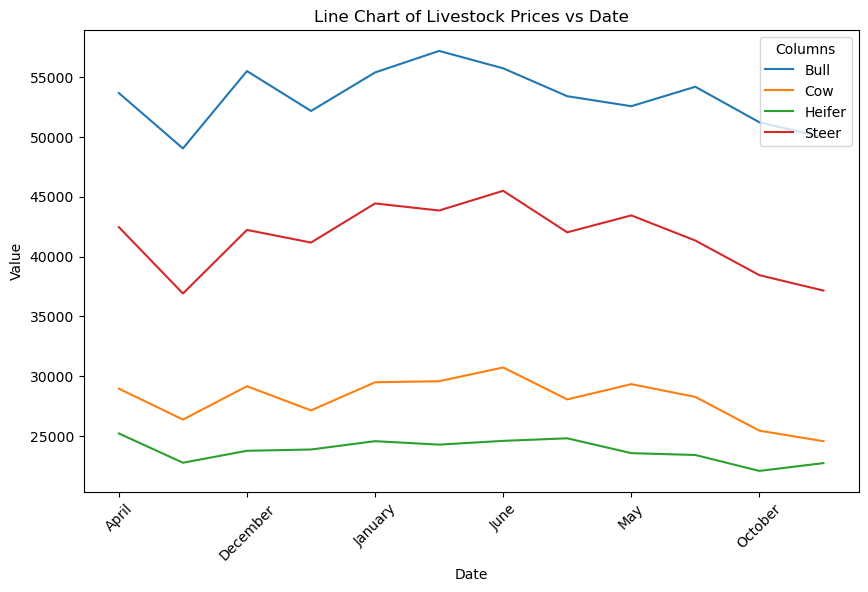

In [46]:
# Assuming your DataFrame is named df
pivot_table = pd.pivot_table(data=df, values=['Cow', 'Bull', 'Heifer', 'Steer'], index='Month')

# Plot the pivot table
pivot_table.plot(figsize=(10, 6))
plt.title('Line Chart of Livestock Prices vs Date')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Columns')
plt.show()


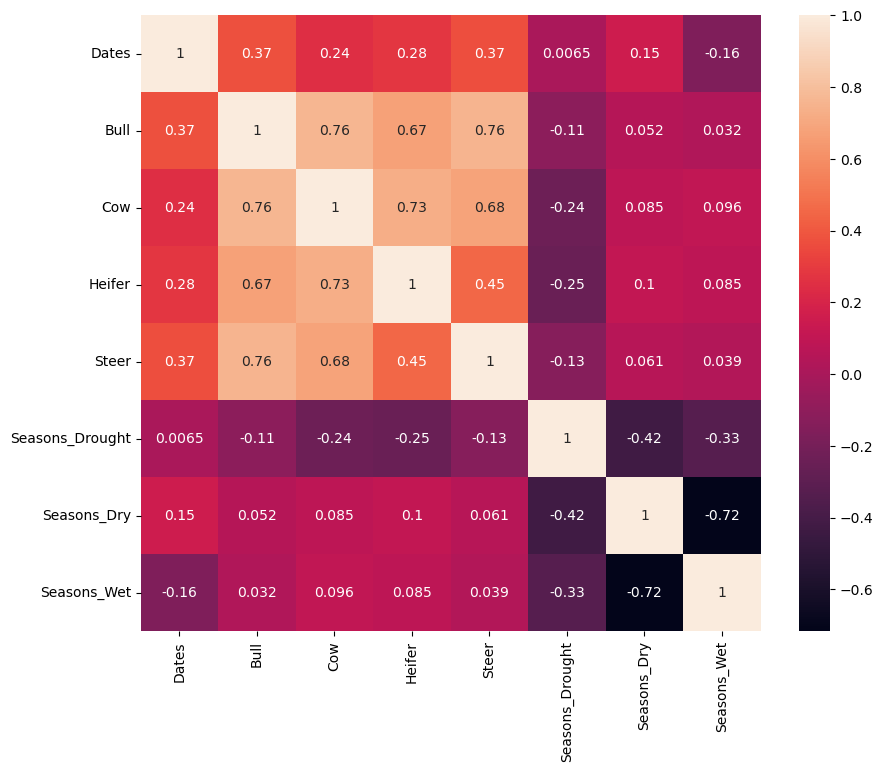

In [48]:
# Assuming 'Seasons' is a categorical column in your DataFrame
# Convert 'Seasons' column to one-hot encoding
df = df.drop(columns=['Month'])

df_encoded = pd.get_dummies(df, columns=['Seasons'])

# Generate the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True)
plt.show()


## Modelling

We shall be using Time Series Analysis to predict the livestock prices and since the prices are affected by season, we will use methods that consider the seasonality aspect of the prices

Let us create 4 different dataframes to the different animals sold

#### Cow

In [58]:
Cow= df.loc[:, ['Dates', 'Cow']]
Cow.set_index('Dates', inplace= True)
Cow.head()

Cow
Dates                  
2009-08-01   966.666667
2009-09-01  4000.000000
2009-10-01  5000.000000
2009-11-01  4815.021851
2009-12-01  9477.777778

#### Bulls

In [59]:
Bull= df.loc[:, ['Dates', 'Bull']]
Bull.set_index('Dates', inplace= True)
Bull.head()

Bull
Dates                   
2009-08-01   8500.000000
2009-09-01  18000.000000
2009-10-01   8500.000000
2009-11-01  12484.312740
2009-12-01  22166.666667

#### Heifers

In [60]:
Heifer= df.loc[:, ['Dates', 'Heifer']]
Heifer.set_index('Dates', inplace= True)
Heifer.head()

Heifer
Dates                   
2009-08-01   1666.666667
2009-09-01  15000.000000
2009-10-01   8000.000000
2009-11-01   5198.550137
2009-12-01  10111.111111

#### Steers

In [61]:
Steer= df.loc[:, ['Dates', 'Steer']]
Steer.set_index('Dates', inplace= True)
Steer.head()

Steer
Dates                   
2009-08-01    766.666667
2009-09-01  13000.000000
2009-10-01   9000.000000
2009-11-01  11302.715033
2009-12-01  18222.222222

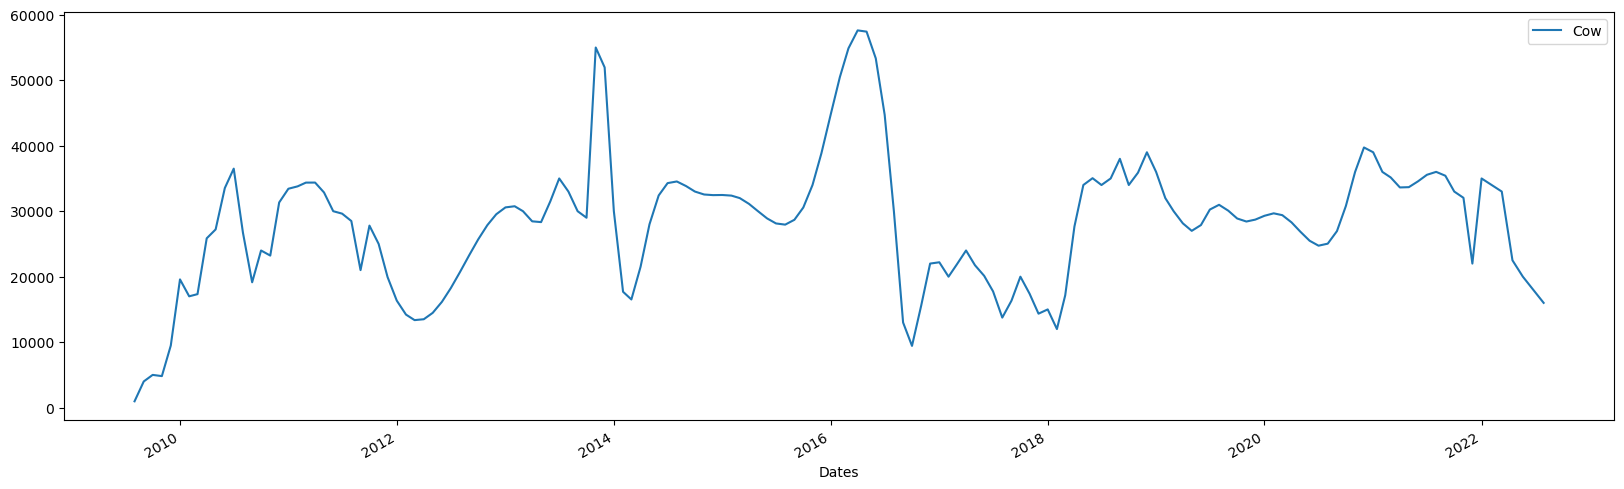

In [62]:
Cow.plot(figsize=(20,6));

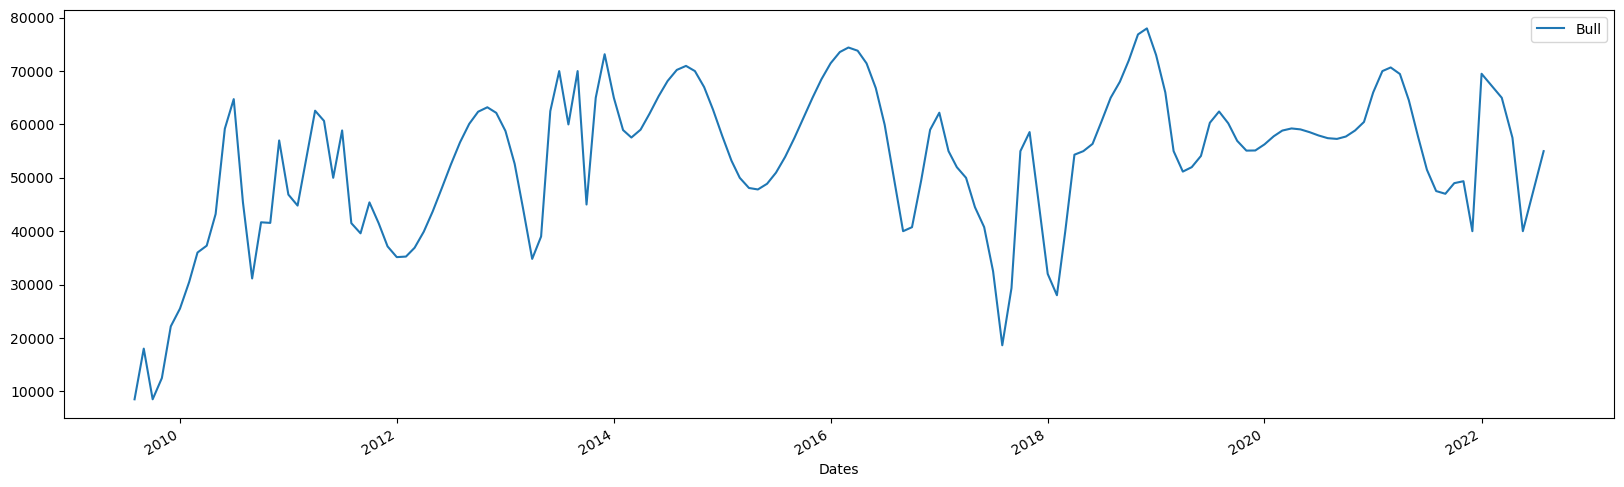

In [63]:
Bull.plot(figsize=(20,6));

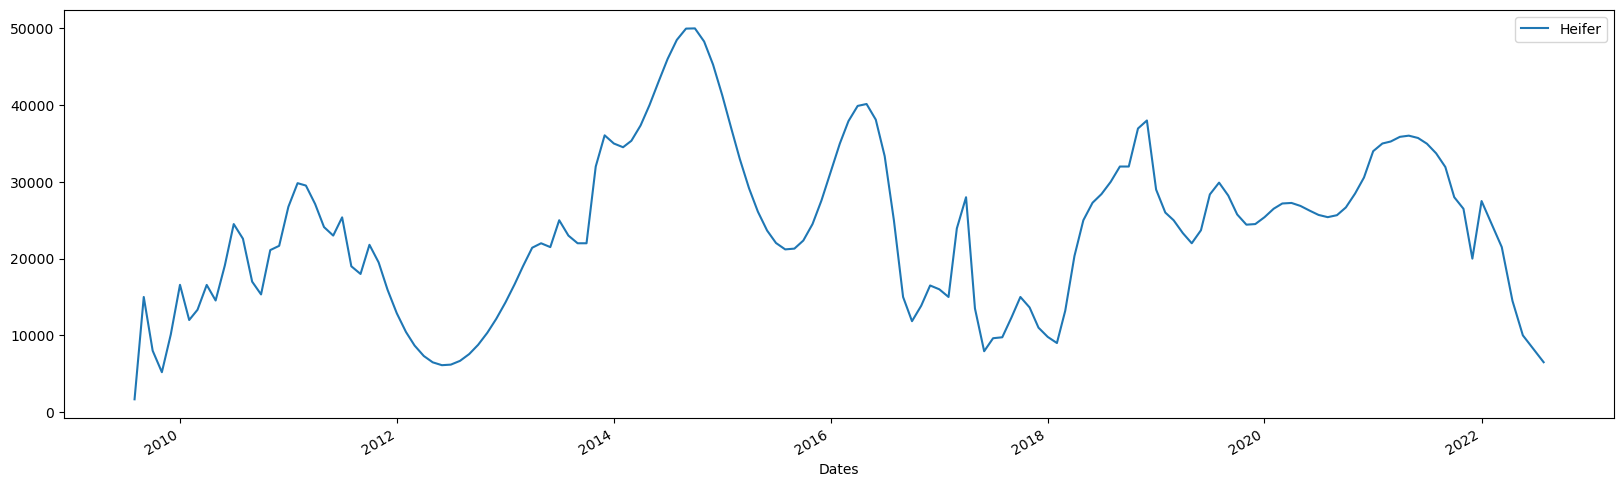

In [64]:
Heifer.plot(figsize=(20,6));

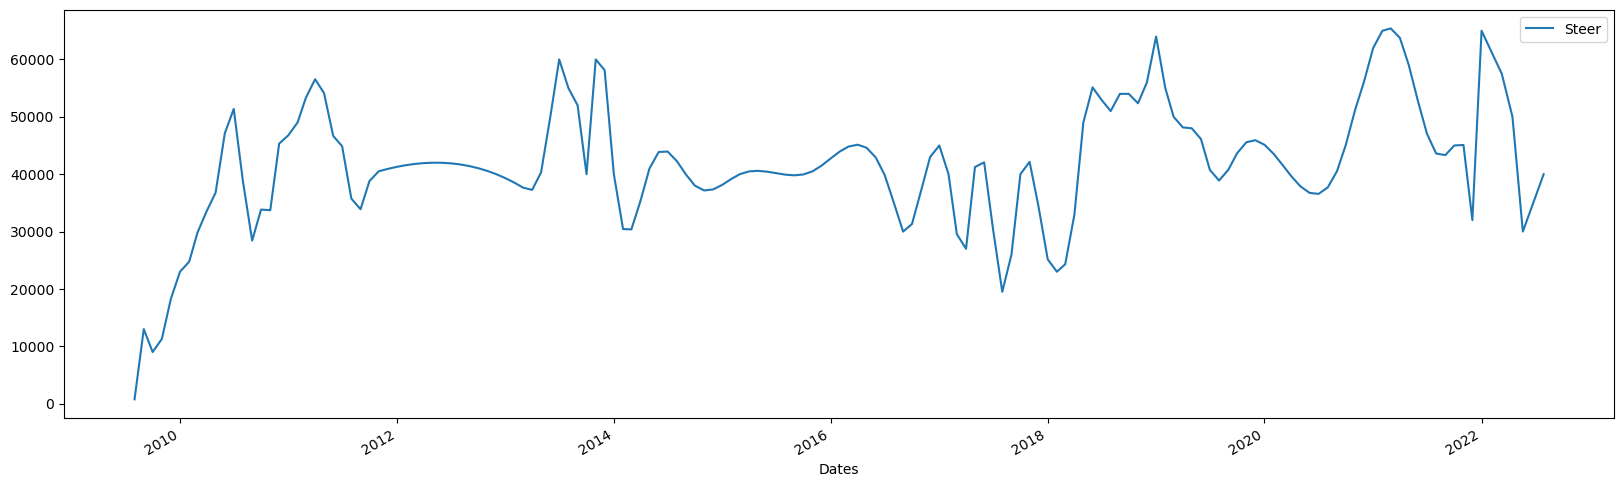

In [65]:
Steer.plot(figsize=(20,6));

In [70]:
# # checking for rolling statistics

# roll_mean = Cow.rolling(window=3, center=False).mean()
# roll_std = Cow.rolling(window= 3, center=False).std()

In [71]:
# fig = plt.figure(figsize=(13,6))
# plt.plot(Cow, color='blue', label='Original')
# plt.plot(roll_mean, color='red', label='Rolling Mean')
# plt.plot(roll_std, color='black', label = 'Rolling Std')
# plt.legend(loc='best')
# plt.title('Rolling Mean & Standard Deviation')
# plt.show(block=False)

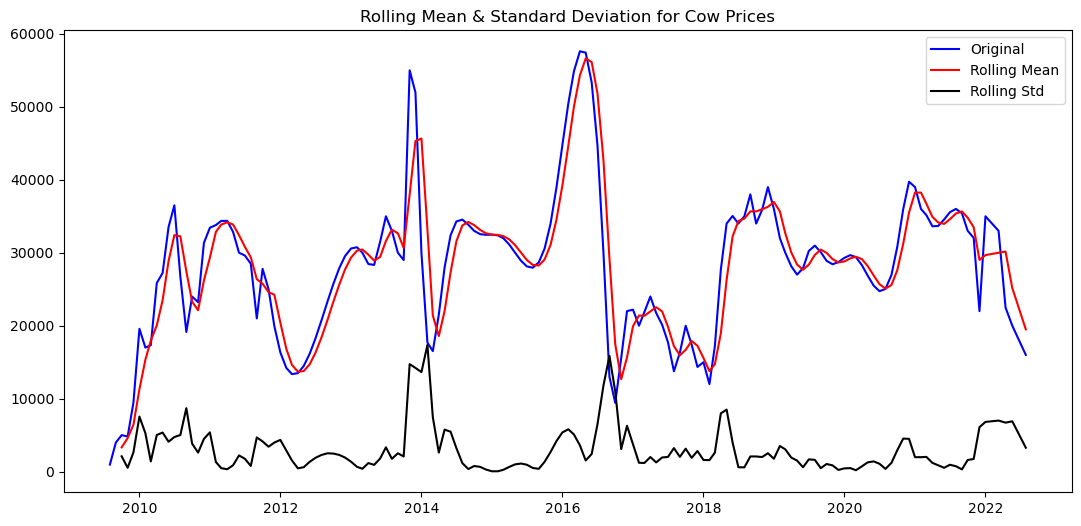

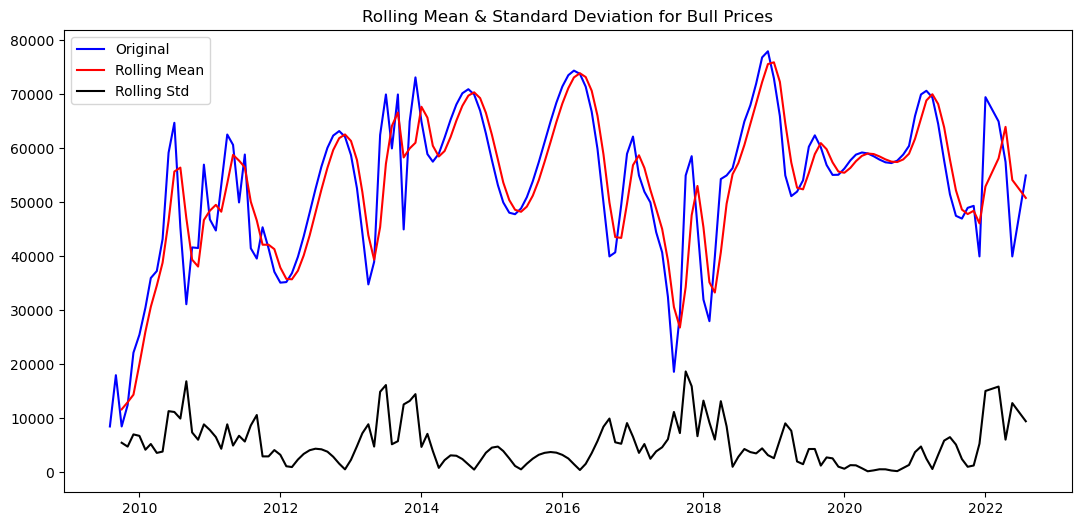

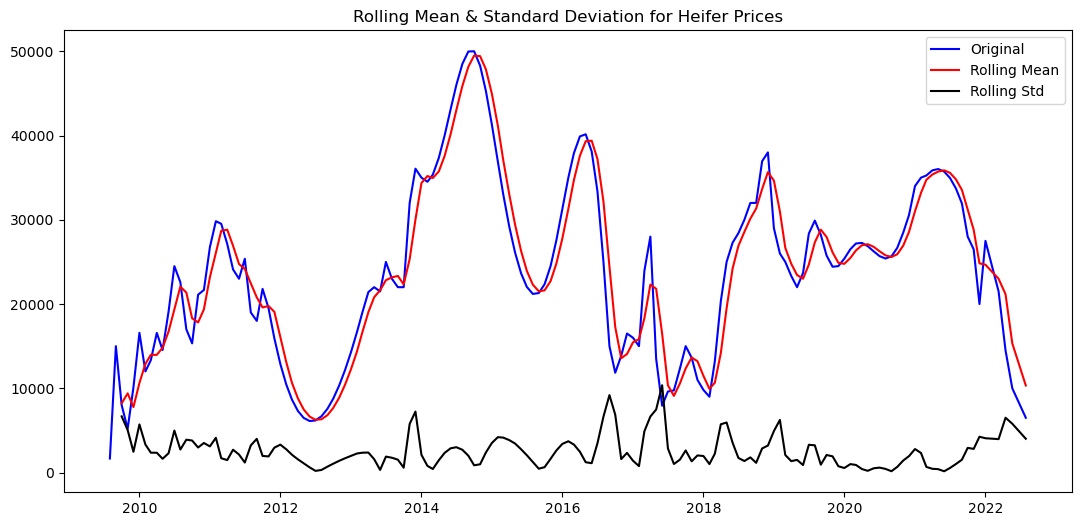

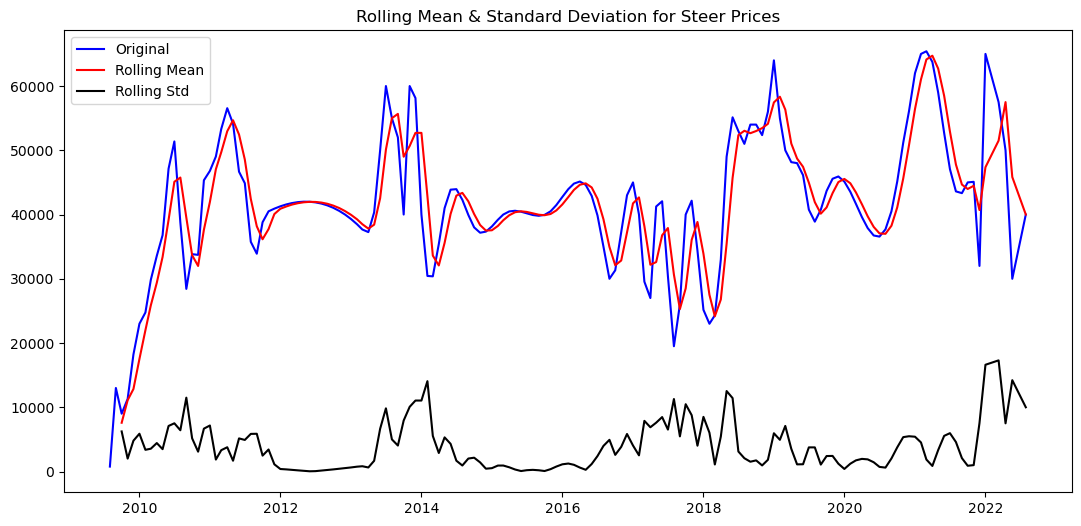

In [72]:
def plot_rolling_statistics(df, livestock_name, window=3):
    """
    Plot the rolling mean and standard deviation for a DataFrame.

    Parameters:
    - df: DataFrame to plot rolling statistics for.
    - livestock_name: Name of the livestock for which the rolling statistics are being plotted.
    - window: Size of the moving window for computing statistics (default=3).
    """
    roll_mean = df.rolling(window=window, center=False).mean()
    roll_std = df.rolling(window=window, center=False).std()

    fig = plt.figure(figsize=(13, 6))
    plt.plot(df, color='blue', label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation for {} Prices'.format(livestock_name))
    plt.show()

# List of DataFrames to plot rolling statistics for
dfs = [(Cow, 'Cow'), (Bull, 'Bull'), (Heifer, 'Heifer'), (Steer, 'Steer')]  # Assuming Cow, Bull, Heifer, and Steer are DataFrames

# Plot rolling statistics for each DataFrame in the list
for df, livestock_name in dfs:
    plot_rolling_statistics(df, livestock_name)


#### Stationarity
Checking for `Stationarity` using the Augmented Dickey-Fuller (ADF) Test

The ADF test is commonly used in econometrics, finance, and other fields dealing with time series data to determine the stationarity of a series before applying further analysis or modeling techniques.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

* Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
* Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
* We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

* p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [73]:
#Augmented Dickey–Fuller test:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(data_series):
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(data_series, autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
        
    return dfoutput


In [74]:
result = augmented_dickey_fuller_test(Cow['Cow'])
print(result)

Results of Dickey Fuller Test:
Test Statistic                  -4.962636
p-value                          0.000026
#Lags Used                       1.000000
Number of Observations Used    152.000000
Critical Value (1%)             -3.474121
Critical Value (5%)             -2.880750
Critical Value (10%)            -2.577013
dtype: float64


* Test Statistic: The test statistic value of approximately -4.96.
* p-value: The p-value is approximately 0.000026, which is below the common significance levels ( 0.05 or 0.01). This suggests strong evidence against the null hypothesis (the time series has a unit root) and indicates that the time series is likely stationary.
* #Lags Used: The number of lags used in the regression when computing the test statistic, which is 1 in this case.
Number of Observations Used: The number of observations used in the ADF regression, which is 152.
* Critical Values: These are the critical values for the test statistic at the 1%, 5%, and 10% significance levels. The test statistic needs to be lower than these values for the null hypothesis to be rejected.
* The ADF test statistic is more negative than the critical values at all common significance levels, indicating that you can reject the null hypothesis of a unit root. Thus, the series appears to be stationary.

In [75]:
result = augmented_dickey_fuller_test(Bull['Bull'])
print(result)

Results of Dickey Fuller Test:
Test Statistic                  -4.736200
p-value                          0.000072
#Lags Used                       1.000000
Number of Observations Used    152.000000
Critical Value (1%)             -3.474121
Critical Value (5%)             -2.880750
Critical Value (10%)            -2.577013
dtype: float64


In [76]:
result = augmented_dickey_fuller_test(Heifer['Heifer'])
print(result)

Results of Dickey Fuller Test:
Test Statistic                  -3.160108
p-value                          0.022413
#Lags Used                       3.000000
Number of Observations Used    150.000000
Critical Value (1%)             -3.474715
Critical Value (5%)             -2.881009
Critical Value (10%)            -2.577151
dtype: float64


In [77]:
result = augmented_dickey_fuller_test(Steer['Steer'])
print(result)

Results of Dickey Fuller Test:
Test Statistic                  -4.422901
p-value                          0.000270
#Lags Used                       4.000000
Number of Observations Used    149.000000
Critical Value (1%)             -3.475018
Critical Value (5%)             -2.881141
Critical Value (10%)            -2.577221
dtype: float64


### Seasonality

The Time Series has seasonality as there are prices vary with to seasons

In [78]:
#Standard ARIMA Model
import pmdarima as pm
from pmdarima.model_selection import train_test_split
ARIMA_model = pm.auto_arima(Cow['Cow'], 
                      start_p=1, 
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=False, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

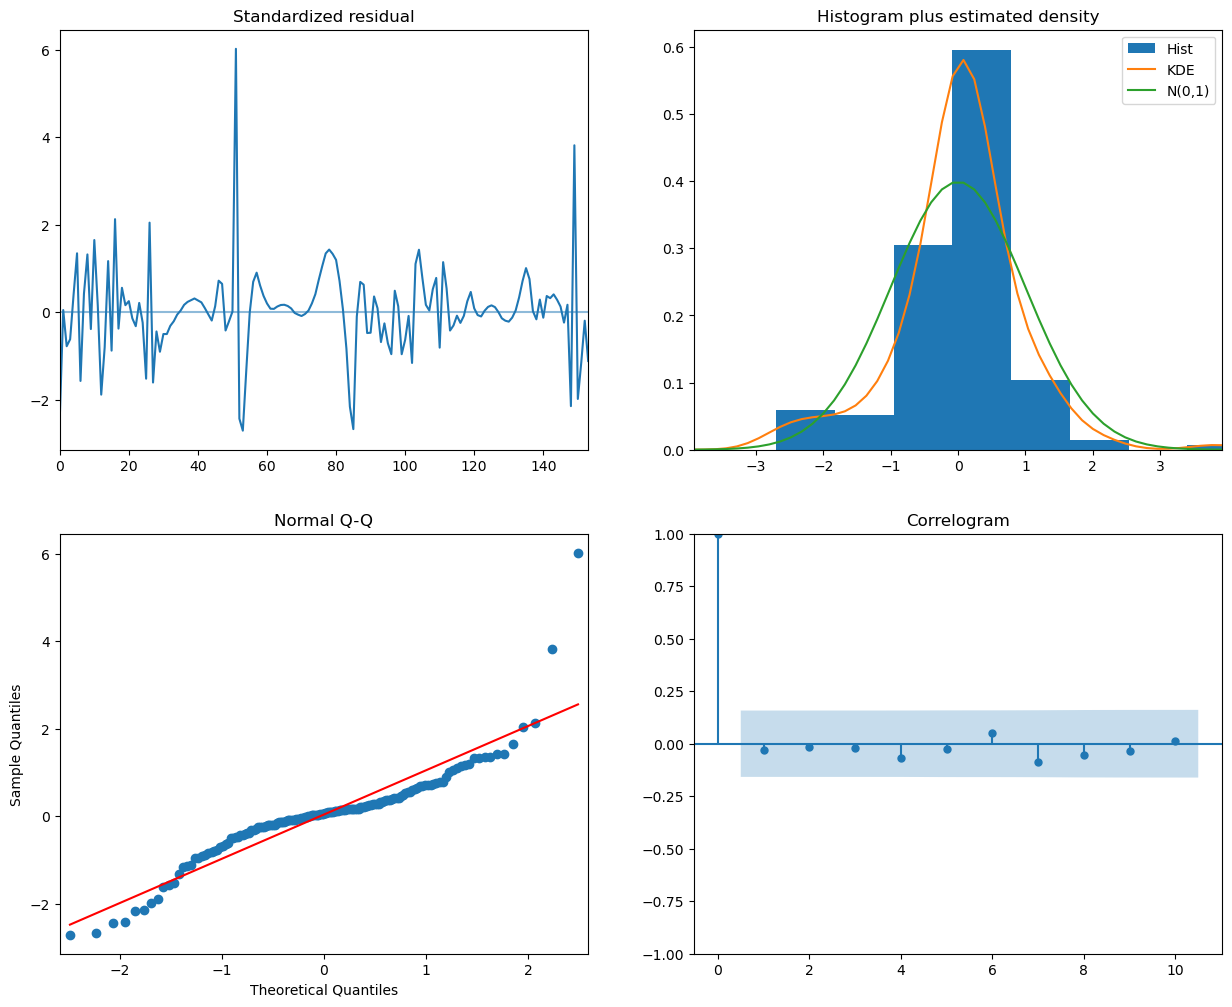

In [79]:
ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [82]:
from statsmodels.tsa.seasonal import seasonal_decompose

def decompose_time_series(data_series, freq='MS', model='additive'):
    # Fill missing values using forward fill
    resampled_data = data_series.resample(freq).mean().ffill()

    # Decompose the time series data using an additive model
    decomposition = seasonal_decompose(resampled_data, model=model)
    decomposition.plot()
    plt.show()

In [83]:
def decompose_time_series(data_series, freq='MS', model='additive'):
    # Fill missing values with the mean of the series
    data_series.fillna(data_series.mean(), inplace=True)
    
    # Decompose the time series data using an additive model
    decomposition = seasonal_decompose(data_series.resample(freq).mean().ffill(), model=model)
    
    # Gather the trend, seasonality, and residuals 
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plot gathered statistics
    plt.figure(figsize=(12,8))
    plt.subplot(411)
    plt.plot(np.log(data_series), label='Original', color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.suptitle('Decomposition of {} Time Series'.format(data_series.name))
    plt.tight_layout()
    plt.show()

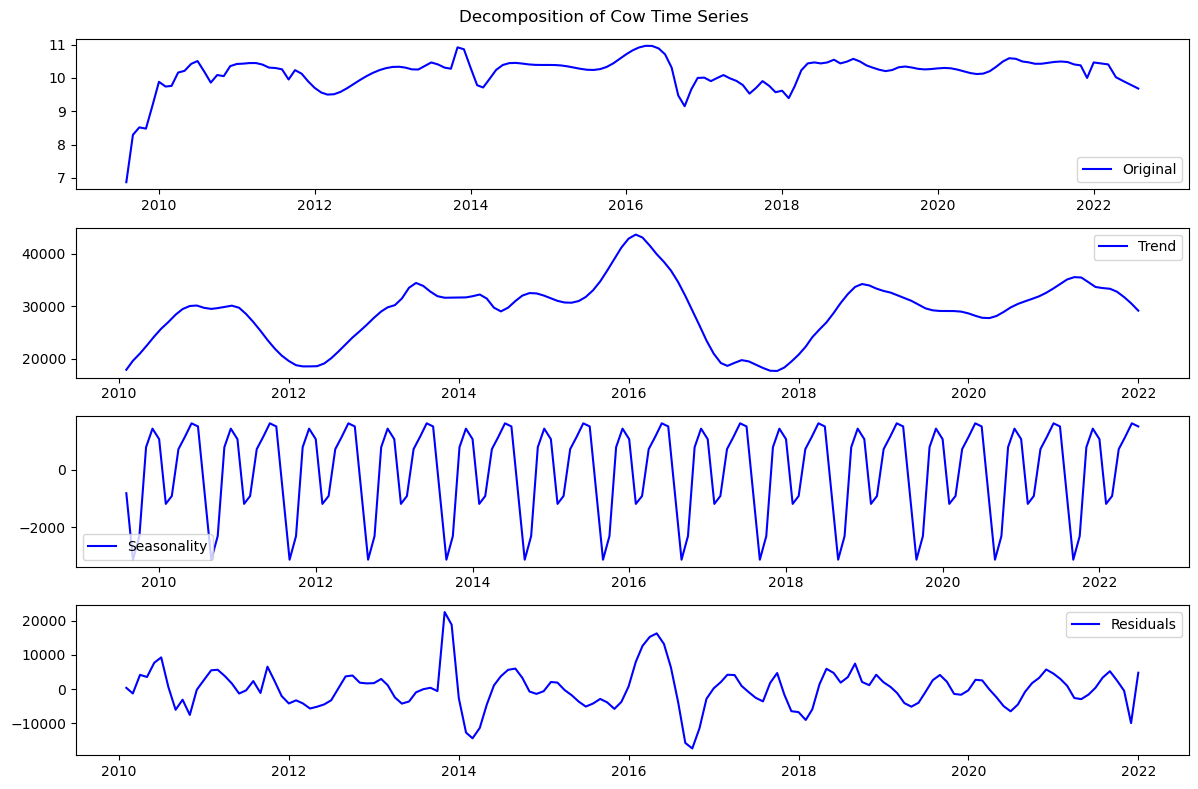

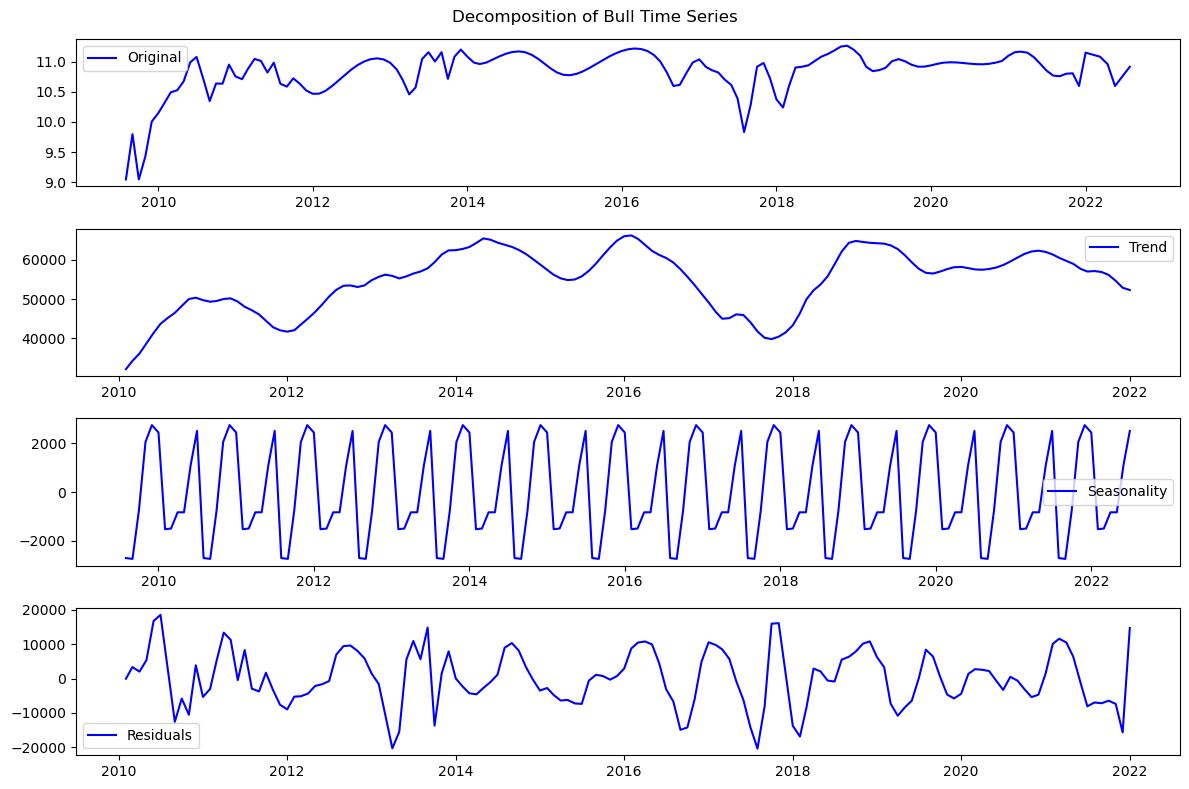

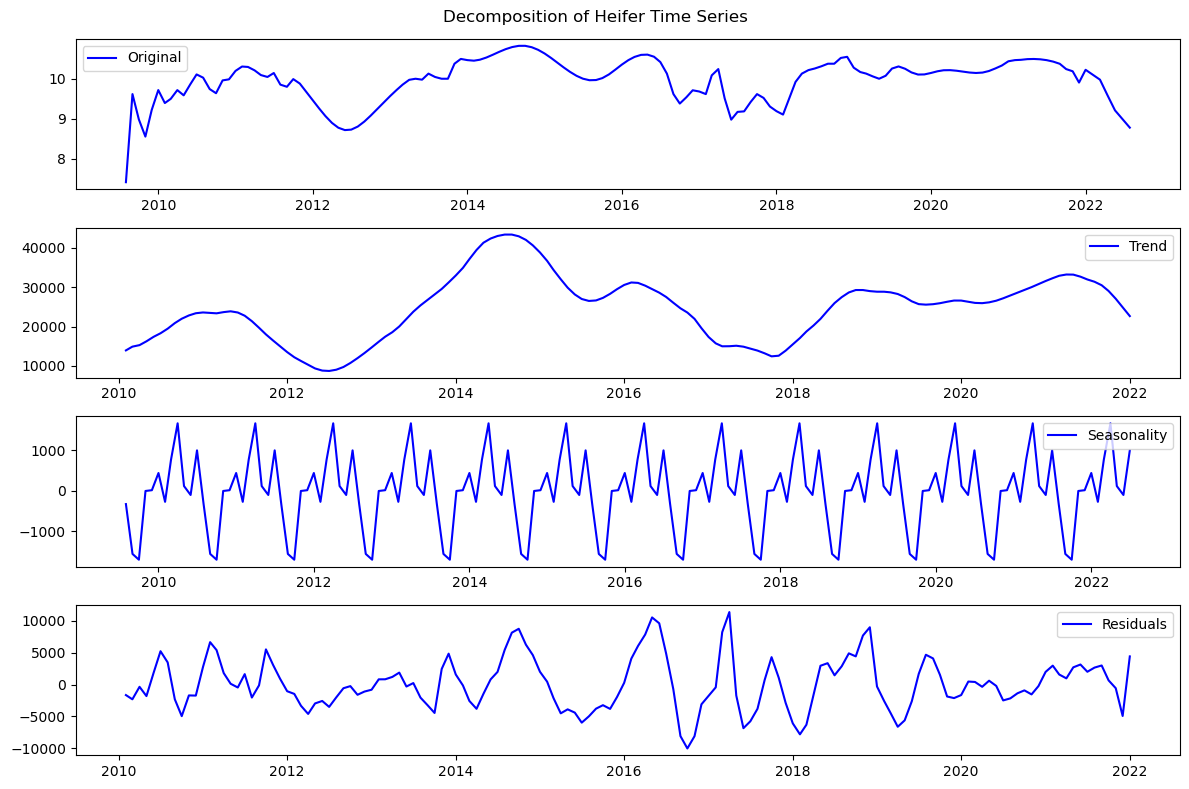

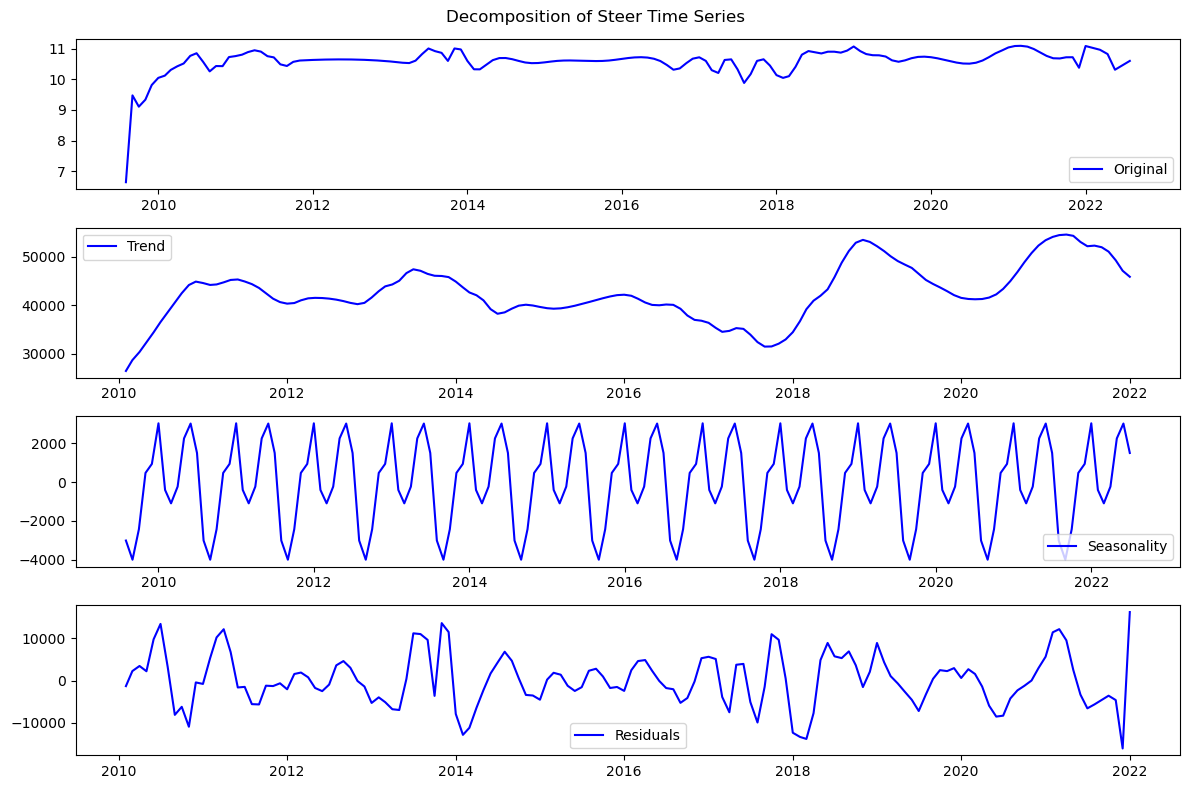

In [84]:
# Assuming you have the time series stored in variables Cow, Bull, Heifer, and Steer

time_series_list = [Cow['Cow'], Bull['Bull'], Heifer['Heifer'], Steer['Steer']]
for series in time_series_list:
    decompose_time_series(series)


The parameters of the ARIMA model are defined as follows:

* p: The lag order, representing the number of lag observations incorporated in the model.
* d: Degree of differencing, denoting the number of times raw observations undergo differencing.
* q: Order of moving average, indicating the size of the moving average window.

In [85]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [86]:
# from pandas.plotting import autocorrelation_plot
# autocorrelation_plot(Cow)
# plt.show()

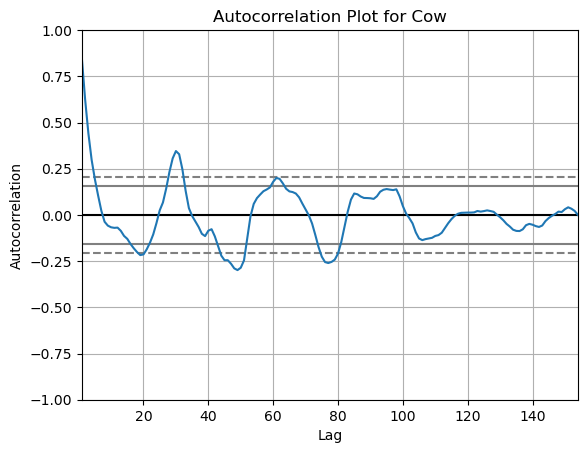

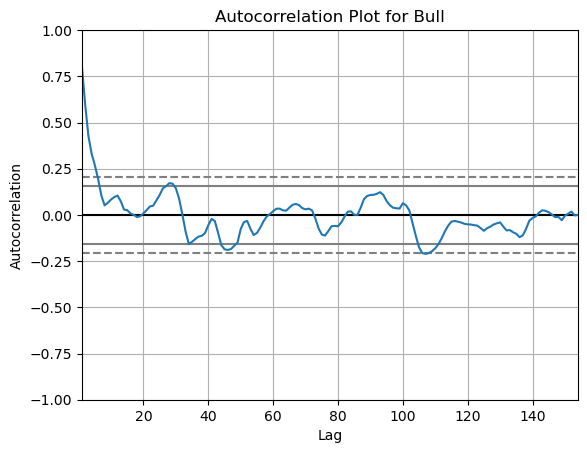

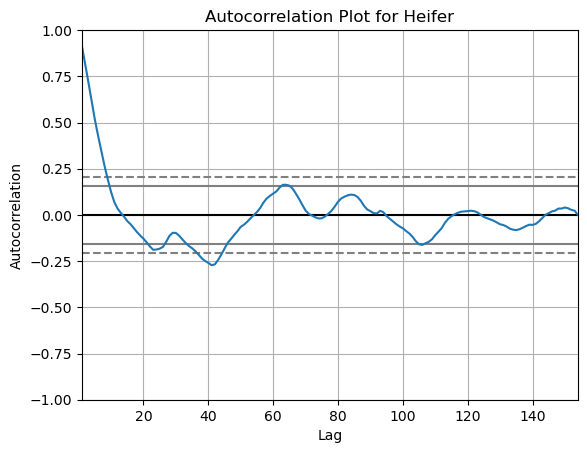

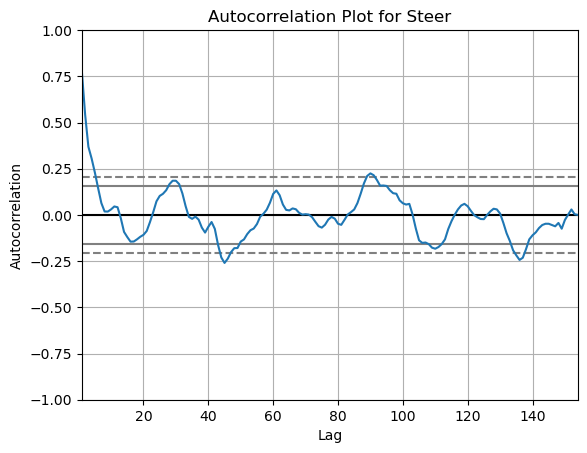

In [87]:
from pandas.plotting import autocorrelation_plot

ts_list = [Cow['Cow'], Bull['Bull'], Heifer['Heifer'], Steer['Steer']]
for series in ts_list:
    autocorrelation_plot(series)
    plt.title('Autocorrelation Plot for {}'.format(series.name))
    plt.show()

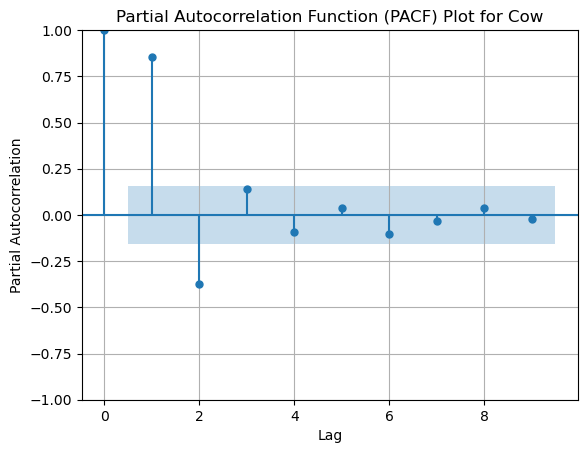

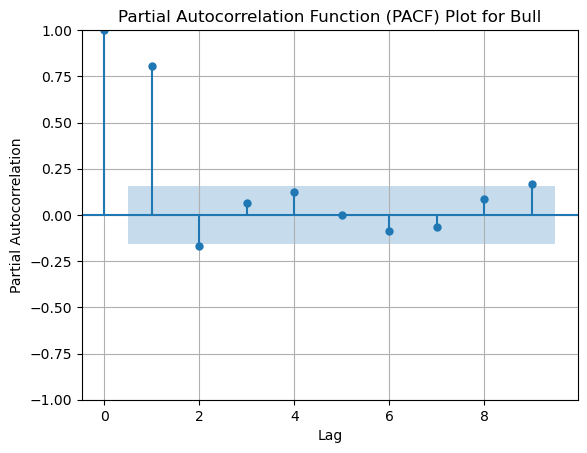

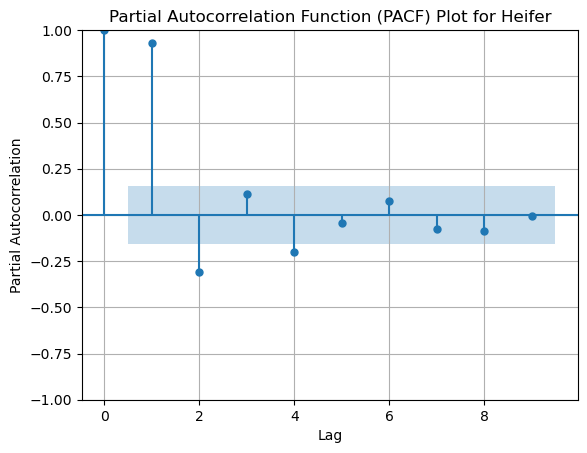

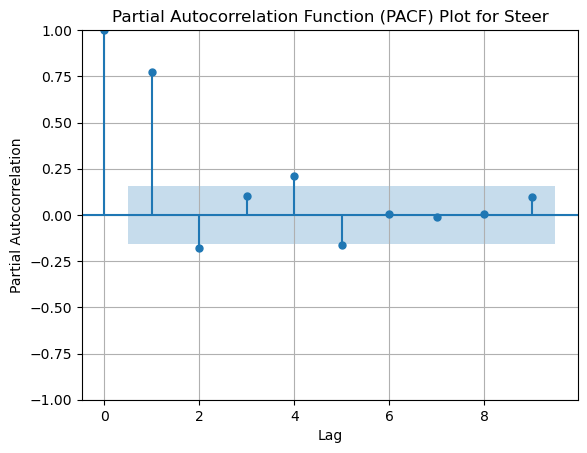

In [88]:
from statsmodels.graphics.tsaplots import plot_pacf

ts_list = [Cow['Cow'], Bull['Bull'], Heifer['Heifer'], Steer['Steer']]

for series in ts_list:
    plot_pacf(series, lags=9, method='ols')
    plt.xlabel('Lag')
    plt.ylabel('Partial Autocorrelation')
    plt.title('Partial Autocorrelation Function (PACF) Plot for {}'.format(series.name))
    plt.grid(True)
    plt.show()



These statistics provide insight into the distribution and variation of residuals, which are the differences between observed and predicted values in a regression analysis. The mean close to zero indicates that, on average, the residuals are centered around zero, suggesting that the model is unbiased. The standard deviation reflects the dispersion of residuals around the mean, with a relatively high value indicating considerable variability in the data. The minimum and maximum values represent the range of residuals, showing the extent of deviation from the predicted values. The quartiles (25th, 50th, and 75th percentiles) provide information about the distribution's spread and central tendency, with the median indicating the middle value of the dataset.

predicted=14668.854433, expected=15000.000000
predicted=16783.780423, expected=12000.000000
predicted=11800.372853, expected=17166.530361
predicted=21270.142925, expected=27666.666667
predicted=30492.425400, expected=34000.000000
predicted=34671.002771, expected=35041.168963
predicted=34093.903119, expected=33997.549820
predicted=32392.449459, expected=35000.000000
predicted=35625.707525, expected=38000.000000
predicted=38278.471360, expected=34000.000000
predicted=29712.365764, expected=35882.785220
predicted=36748.325919, expected=39000.000000
predicted=38044.744538, expected=36000.000000
predicted=33396.578412, expected=32000.000000
predicted=30334.721410, expected=30000.000000
predicted=28845.072429, expected=28146.182784
predicted=27799.651261, expected=27000.000000
predicted=26795.109829, expected=27883.622514
predicted=27976.960330, expected=30250.461392
predicted=30915.832399, expected=30977.265419
predicted=30694.750292, expected=30079.377655
predicted=29467.079416, expected=2

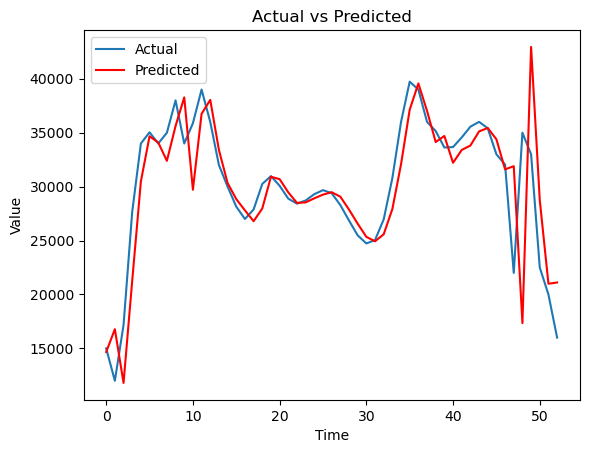

In [91]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# Splitting the data into train and test sets
X = Cow.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# Walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(8, 1, 1 ))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# Evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# Plot forecasts against actual outcomes
plt.plot(test, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [92]:
# from sklearn.model_selection import train_test_split
# train, test = train_test_split(Cow, test_size = 0.40, shuffle = False) # Shuffle = False is IMPORTANT!
# def train_test_plot(train, test):
#     plt.figure(figsize=(16, 8))
#     plt.plot(train, c='blue')
#     plt.plot(test, c='orange');

# train_test_plot(train, test)

In [93]:
import warnings
warnings.filterwarnings('ignore')
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
from datetime import datetime
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [94]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [95]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(Cow,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}: AIC Calculated={}'.format(comb, combs, output.aic))
        except:
            continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16487D+01    |proj g|=  2.17604D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   2.176D-07   1.165D+01
  F =   11.648653627119186     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 0, 0) x (0, 0, 0, 12): AIC Calculated=3589.7853171527095
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.03139D+00    |proj g|=  1.85725D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   1.195D-05   9.031D+00
  F =   9.0313921095360410     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 0, 0) x (1, 1, 1, 12): AIC Calculated=2787.668769737101
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14695D+01    |proj g|=  6.41424D-01

At iterate    5    f=  1.12078D+01    |proj g|=  3.56713D-03

   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.02569D+01    |proj g|=  9.39718D-03

At iterate   10    f=  1.02569D+01    |proj g|=  7.36732D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     15      1     0     0   7.367D-05   1.026D+01
  F =   10.256877658819718     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 0, 1) x (0, 0, 1, 12): AIC Calculated=3165.118318916473
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.73838D+00    |proj g|=  5.33542D-01

At 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  8.69505D+00    |proj g|=  1.16050D-02

At iterate   20    f=  8.68470D+00    |proj g|=  1.07436D-01

At iterate   25    f=  8.55423D+00    |proj g|=  6.36829D-02

At iterate   30    f=  8.54946D+00    |proj g|=  4.36478D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     39      1     0     0   7.216D-07   8.549D+00
  F =   8.5494635025290595     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 0, 1) x (0, 1, 1, 12): AIC Calculated=2639.2347587789504
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =        

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA (0, 0, 1) x (1, 0, 1, 12): AIC Calculated=3156.071249939719
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.01258D+00    |proj g|=  5.14847D-01

At iterate    5    f=  8.85175D+00    |proj g|=  4.39003D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     10      1     0     0   4.190D-05   8.852D+00
  F =   8.8517287552342356     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 0, 1) x (1, 1, 0, 12): AIC Calculated=2732.3324566121446

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.02410D+00    |proj g|=  2.39294D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     14      1     0     0   1.681D-05   9.024D+00
  F =   9.0240923862588360     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 1, 0) x (1, 0, 1, 12): AIC Calculated=2785.4204549677215
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51290D+00    |proj g|=  5.19833D-06

           * * *

Tit   = total number of iterations
Tnf   = tot

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      6      1     0     0   4.505D-06   9.179D+00
  F =   9.1791147902474215     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 1, 1) x (0, 1, 0, 12): AIC Calculated=2831.167355396206
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.24876D+00    |proj g|=  1.52305D-01

At iterate    5    f=  8.21123D+00    |proj g|=  1.71550D-03

           * * *

Tit   = total number of iterations
Tnf   = tota

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  8.89018D+00    |proj g|=  1.25615D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     29      1     0     0   1.756D-05   8.890D+00
  F =   8.8901765769852297     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 1, 1) x (1, 0, 1, 12): AIC Calculated=2746.1743857114507
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.45035D+00    |proj g|=  3.16718D-02

           * * *

Tit   = total number of iterations
Tnf   = tot

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.21115D+00    |proj g|=  1.49766D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     14      1     0     0   6.023D-05   8.211D+00
  F =   8.2111501624512471     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 1, 1) x (1, 1, 1, 12): AIC Calculated=2537.034250034984
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.86972D+00    |proj g|=  1.78067D-04

           * * *

Tit   = total number of iterations
Tnf   = tota

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.39881D+00    |proj g|=  3.68861D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     16      1     0     0   1.028D-04   8.398D+00
  F =   8.3984060404920040     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 0) x (0, 1, 1, 12): AIC Calculated=2592.709060471537
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.44711D+00    |proj g|=  8.00290D-01

At iterate    5    f=  9.08793D+00    |proj g|=  2.51705D-01
ARIM


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.08689D+00    |proj g|=  9.35166D-02

At iterate   10    f=  9.08658D+00    |proj g|=  2.68694D-02

At iterate   15    f=  9.08646D+00    |proj g|=  7.89466D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     21      1     0     0   7.895D-06   9.086D+00
  F =   9.0864551071269286     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (1, 0, 0) x (1, 0, 1, 12): AIC Calculated=2806.6281729950942
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA (1, 0, 0) x (1, 1, 1, 12): AIC Calculated=2594.671772564595
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.73475D+00    |proj g|=  5.64371D-02

At iterate    5    f=  9.73301D+00    |proj g|=  4.65938D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   4.659D-06   9.733D+00
  F =   9.7330072357431554     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (1, 0, 1) x (0, 0, 0, 12): AIC Calculated=3003.7662286088917

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     14      1     0     0   5.341D-05   8.257D+00
  F =   8.2566237864413647     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 1) x (0, 1, 1, 12): AIC Calculated=2551.04012622394
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.33555D+00    |proj g|=  7.24017D-01

At iterate    5    f=  9.01680D+00    |proj g|=  6.34017D-02

At iterate   10    f=  9.01447D+00    |proj g|=  1.02355D-05

    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate   15    f=  8.95159D+00    |proj g|=  8.02551D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     20      1     0     0   4.156D-05   8.952D+00
  F =   8.9515863004230898     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 1) x (1, 0, 1, 12): AIC Calculated=2767.0885805303114
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.40219D+00    |proj g|=  4.80451D-02

At iterate    5    f=  8.40030D+00    |proj g|=  2.58627D-05

At 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.26076D+00    |proj g|=  5.18033D-02

At iterate   10    f=  8.25654D+00    |proj g|=  3.75191D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     17      1     0     0   5.346D-05   8.257D+00
  F =   8.2565351622296124     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 1) x (1, 1, 1, 12): AIC Calculated=2553.012829966721
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.76434D+00    |proj g|=  5.40687D-06

   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.40541D+00    |proj g|=  7.43152D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      6      1     0     0   2.988D-05   8.405D+00
  F =   8.4053687522118086     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 0) x (1, 1, 0, 12): AIC Calculated=2594.853575681237
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At it

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA (1, 1, 1) x (0, 1, 0, 12): AIC Calculated=2832.631717261944
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.24743D+00    |proj g|=  1.50964D-01

At iterate    5    f=  8.21069D+00    |proj g|=  3.05386D-03

At iterate   10    f=  8.21061D+00    |proj g|=  6.01897D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     17      1     0     0   6.019D-05   8.211D+00
  F =   8.2106093963766575     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIM

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.88969D+00    |proj g|=  7.61504D-04

At iterate   10    f=  8.88950D+00    |proj g|=  1.47000D-02

At iterate   15    f=  8.88855D+00    |proj g|=  9.06743D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     29      1     0     0   1.924D-05   8.889D+00
  F =   8.8885474643397249     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 1) x (1, 0, 1, 12): AIC Calculated=2747.6726190166355
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At

 This problem is unconstrained.



At iterate    5    f=  8.21060D+00    |proj g|=  5.12765D-03

At iterate   10    f=  8.21054D+00    |proj g|=  3.76408D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     17      1     0     0   6.018D-05   8.211D+00
  F =   8.2105408433873777     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 1) x (1, 1, 1, 12): AIC Calculated=2538.846579763312


In [96]:
def grid_search_sarimax(pdq, pdqs, series):
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(series,
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                output = mod.fit(disp=False)
                ans.append([comb, combs, output.aic])
                print('ARIMA {} x {}: AIC Calculated={}'.format(comb, combs, output.aic))
            except Exception as e:
                print(e)
                continue

    # Find the best parameters
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    best_params = ans_df.loc[ans_df['aic'].idxmin()]
    print("Best Parameters (AIC): ", best_params)
    return best_params
best_params = grid_search_sarimax(pdq, pdqs, Cow)

ARIMA (0, 0, 0) x (0, 0, 0, 12): AIC Calculated=3589.7853171527095
ARIMA (0, 0, 0) x (0, 0, 1, 12): AIC Calculated=3241.7705949217407
ARIMA (0, 0, 0) x (0, 1, 0, 12): AIC Calculated=3097.020080749976
ARIMA (0, 0, 0) x (0, 1, 1, 12): AIC Calculated=2793.6866538834574
ARIMA (0, 0, 0) x (1, 0, 0, 12): AIC Calculated=3117.836036840081
ARIMA (0, 0, 0) x (1, 0, 1, 12): AIC Calculated=3070.9074531315423
ARIMA (0, 0, 0) x (1, 1, 0, 12): AIC Calculated=2821.1438336465526
ARIMA (0, 0, 0) x (1, 1, 1, 12): AIC Calculated=2787.668769737101
ARIMA (0, 0, 1) x (0, 0, 0, 12): AIC Calculated=3456.0151384326555
ARIMA (0, 0, 1) x (0, 0, 1, 12): AIC Calculated=3165.118318916473
ARIMA (0, 0, 1) x (0, 1, 0, 12): AIC Calculated=2955.1305623804747
ARIMA (0, 0, 1) x (0, 1, 1, 12): AIC Calculated=2639.2347587789504
ARIMA (0, 0, 1) x (1, 0, 0, 12): AIC Calculated=3200.7334493580083
ARIMA (0, 0, 1) x (1, 0, 1, 12): AIC Calculated=3156.071249939719
ARIMA (0, 0, 1) x (1, 1, 0, 12): AIC Calculated=2732.3324566121446


In [97]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (0, 1, 1)
pdqs    (0, 1, 1, 12)
aic       2535.056542
Name: 27, dtype: object

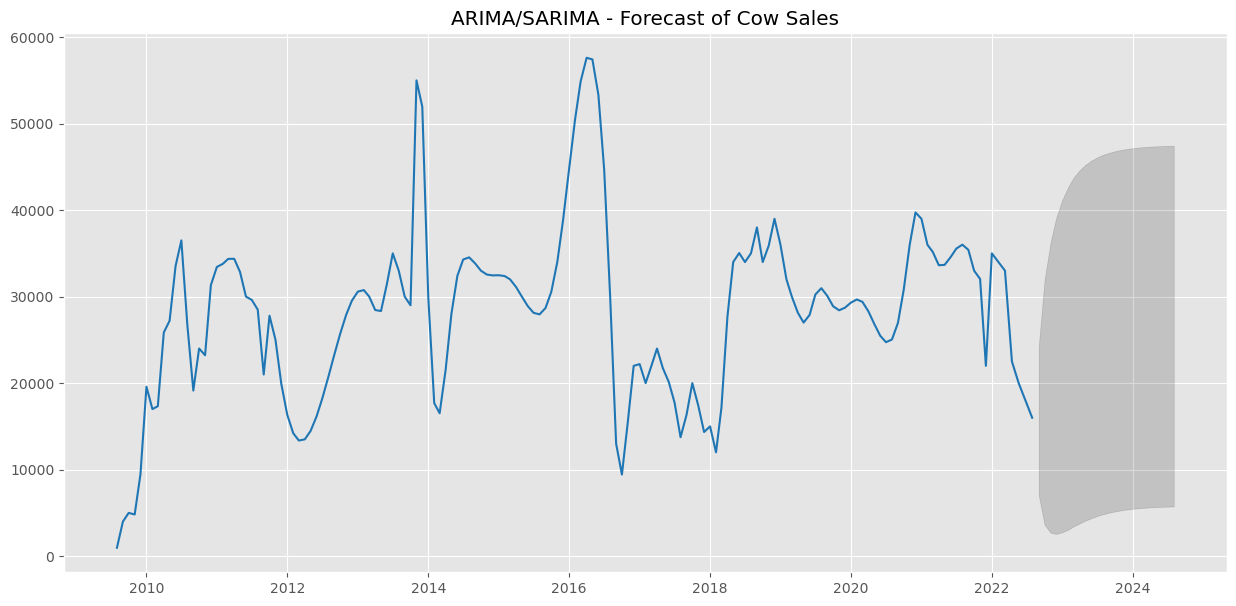

In [98]:
def forecast(ARIMA_model, df, periods=24):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    
    last_date = pd.to_datetime(df.index[-1])
    index_of_fc = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_periods, freq='MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15, 7))
    plt.plot(Cow['Cow'], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color='k', alpha=.15)

    plt.title("ARIMA/SARIMA - Forecast of Cow Sales")
    plt.show()

# Call the forecast function with appropriate arguments
forecast(ARIMA_model, Cow)

In [99]:
def forecast(ARIMA_model, series, periods=24):
    # Forecast
    n_periods = periods
    pred_conf = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)

    if isinstance(pred_conf, tuple):  # If the return is a tuple
        fitted = pred_conf[0]
        confint = pred_conf[1]
    else:  # If the return is a single array
        fitted = pred_conf
        confint = None
    
    last_date = pd.to_datetime(series.index[-1])
    index_of_fc = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_periods, freq='MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    if confint is not None:
        lower_series = pd.Series(confint[:, 0], index=index_of_fc)
        upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15, 7))
    plt.plot(series, color='#1f76b4', label='Original')
    plt.plot(fitted_series, color='darkgreen', label='Forecast')
    if confint is not None:
        plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)

    plt.title("ARIMA/SARIMA - Forecast")
    plt.legend()
    plt.show()

# Example usage:
#Replace ARIMA_model with your ARIMA model and Cow['Cow'] with your actual data series
forecast(ARIMA_model_fit, Cow['Cow'])


NameError: name 'ARIMA_model_fit' is not defined

In [108]:
# Seasonal - fit stepwise auto-ARIMA
SARIMA_model = pm.auto_arima(Cow['Cow'], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=12, #12 is the frequency of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)


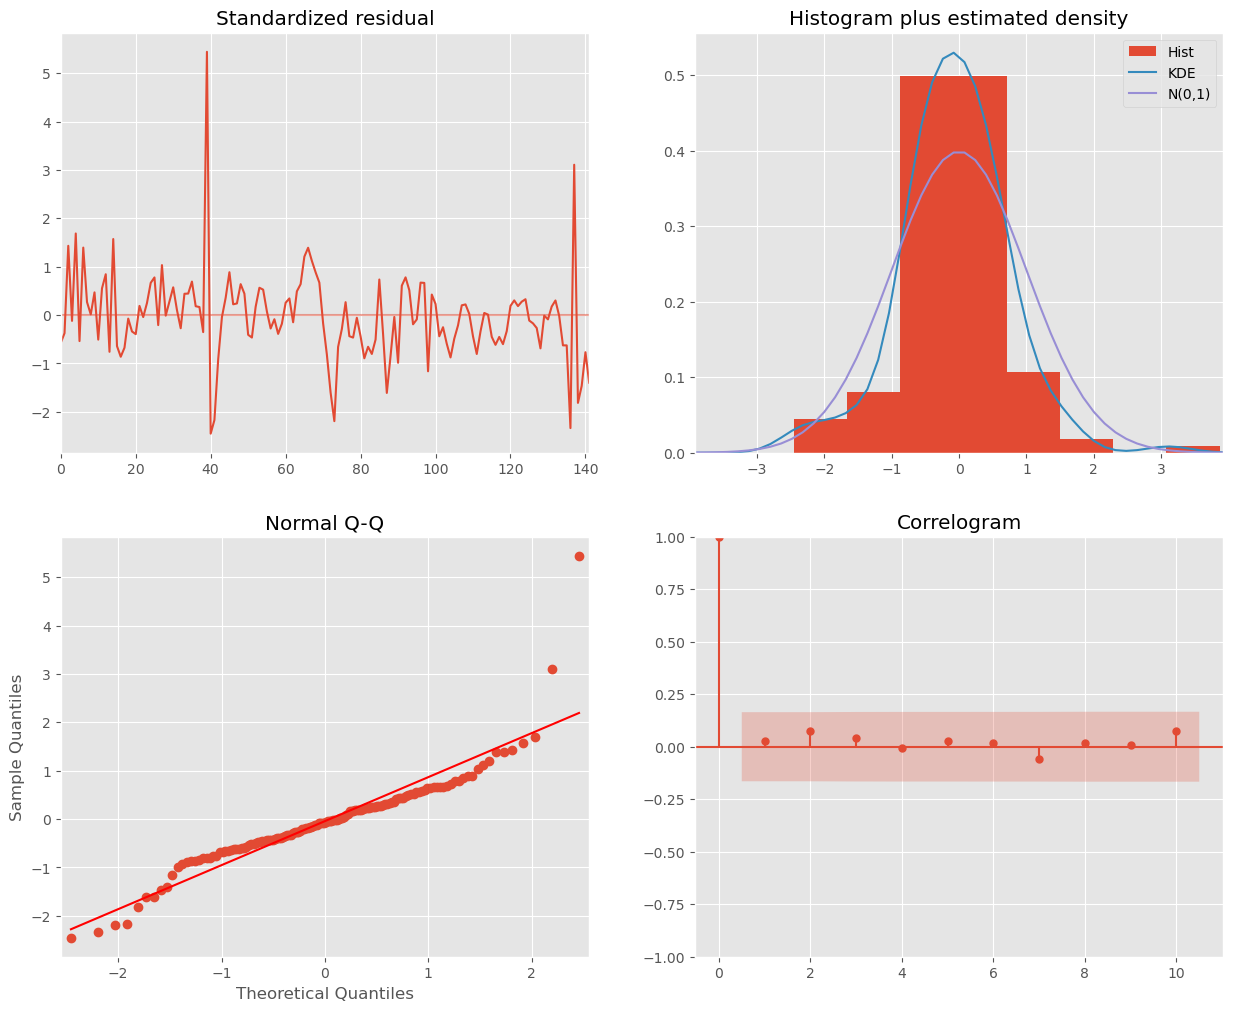

In [ ]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [ ]:
forecast(SARIMA_model, Cow, periods=24)

NameError: name 'SARIMA_model' is not defined

In [ ]:
forecast(SARIMA_model, Heifer, periods=24)

NameError: name 'SARIMA_model' is not defined

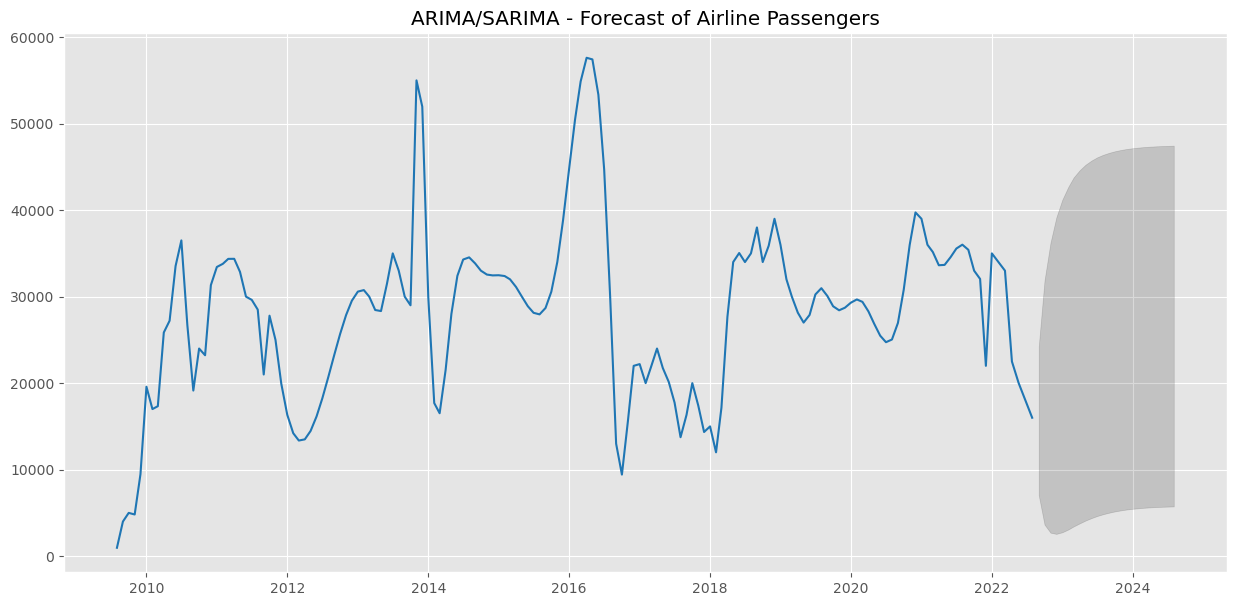

In [ ]:
def forecast(ARIMA_model, df, periods=24):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    
    last_date = pd.to_datetime(df.index[-1])
    index_of_fc = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_periods, freq='MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15, 7))
    plt.plot(Cow['Cow'], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color='k', alpha=.15)

    plt.title("ARIMA/SARIMA - Forecast of Airline Passengers")
    plt.show()

# Call the forecast function with appropriate arguments
forecast(ARIMA_model, Cow)


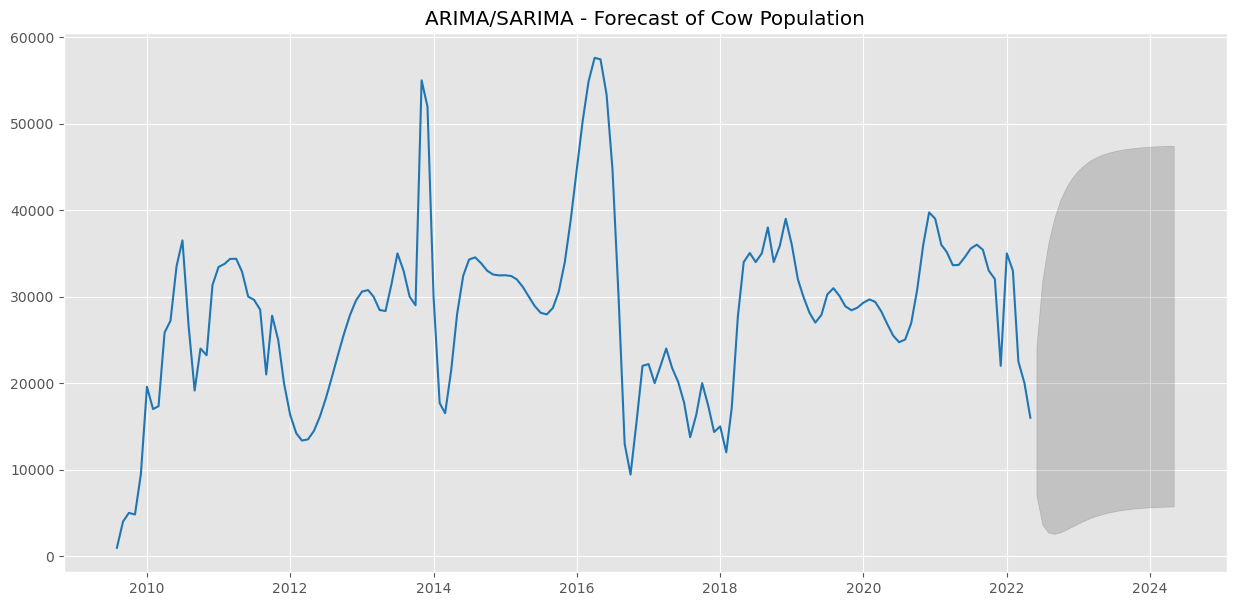

In [ ]:
# Set the index of Cow dataframe to a datetime index with frequency
Cow.index = pd.date_range(start=Cow.index[0], periods=len(Cow), freq='MS')

def forecast(ARIMA_model, df, periods=24):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    
    last_date = pd.to_datetime(df.index[-1])
    index_of_fc = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_periods, freq='MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15, 7))
    plt.plot(df['Cow'], color='#1f76b4')
    plt.plot(fitted_series, color='orange')
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color='k', alpha=.15)

    plt.title("ARIMA/SARIMA - Forecast of Cow Population")
    plt.show()

# Call the forecast function with appropriate arguments
forecast(ARIMA_model, Cow)


In [104]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# # Fit SARIMA model
# sarima_model = SARIMAX(Cow, order=(8, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust seasonal_order as needed
# sarima_model_fit = sarima_model.fit()

# # Summary of fit model
# print(sarima_model_fit.summary())

# # Line plot of residuals
# residuals = sarima_model_fit.resid
# residuals.plot()
# plt.title('Line Plot of SARIMA Residuals')
# plt.show()

# # Density plot of residuals
# residuals.plot(kind='kde')
# plt.title('Density Plot of SARIMA Residuals')
# plt.show()

# # Summary stats of residuals
# print(residuals.describe())


In [105]:
# # Splitting the data into train and test sets
# X = Cow.values
# size = int(len(X) * 0.66)
# train, test = X[0:size], X[size:len(X)]
# history = [x for x in train]
# predictions = list()

# # Walk-forward validation
# for t in range(len(test)):
#     model = SARIMAX(history, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))  # Adjust seasonal_order as needed
#     model_fit = model.fit()
#     output = model_fit.forecast()
#     yhat = output[0]
#     predictions.append(yhat)
#     obs = test[t]
#     history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))

# # Evaluate forecasts
# rmse = sqrt(mean_squared_error(test, predictions))
# print('Test RMSE: %.3f' % rmse)

# # Plot forecasts against actual outcomes
# plt.plot(test, label='Actual')
# plt.plot(predictions, color='red', label='Predicted')
# plt.title('Actual vs Predicted')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.legend()
# plt.show()


In [106]:
# # Splitting the data into train and test sets
# X = Cow.values
# size = int(len(X) * 0.66)
# train, test = X[0:size], X[size:len(X)]
# history = [x for x in train]
# predictions = list()
# results = {'predicted': [], 'expected': []}

# # Walk-forward validation
# for t in range(len(test)):
#     model = SARIMAX(history, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))  # Adjust seasonal_order as needed
#     model_fit = model.fit()
#     output = model_fit.forecast()
#     yhat = output[0]
#     predictions.append(yhat)
#     obs = test[t]
#     history.append(obs)
#     results['predicted'].append(yhat)
#     results['expected'].append(obs)

# # Store results in a DataFrame
# results_df = pd.DataFrame(results)

# # Evaluate forecasts
# rmse = sqrt(mean_squared_error(results_df['expected'], results_df['predicted']))
# print('Test RMSE: %.3f' % rmse)

# # Plot forecasts against actual outcomes
# plt.plot(results_df['expected'], label='Actual')
# plt.plot(results_df['predicted'], color='red', label='Predicted')
# plt.title('Actual vs Predicted')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.legend()
# plt.show()

# # Display results DataFrame
# print(results_df)


predicted=12662.850943, expected=15000.000000
predicted=14639.151783, expected=12000.000000
predicted=11223.517865, expected=17166.530361
predicted=21670.909222, expected=27666.666667
predicted=30847.074426, expected=34000.000000
predicted=36151.764093, expected=35041.168963
predicted=34401.443393, expected=33997.549820
predicted=30983.469793, expected=35000.000000
predicted=34208.901651, expected=38000.000000
predicted=41332.309383, expected=34000.000000
predicted=33627.678342, expected=35882.785220
predicted=38366.668418, expected=39000.000000
predicted=38736.454168, expected=36000.000000
predicted=33101.094252, expected=32000.000000
predicted=32402.628754, expected=30000.000000
predicted=31534.139870, expected=28146.182784
predicted=27535.144352, expected=27000.000000
predicted=27442.154642, expected=27883.622514
predicted=27885.258895, expected=30250.461392
predicted=28892.686826, expected=30977.265419
predicted=29794.487200, expected=30079.377655
predicted=31234.156971, expected=2

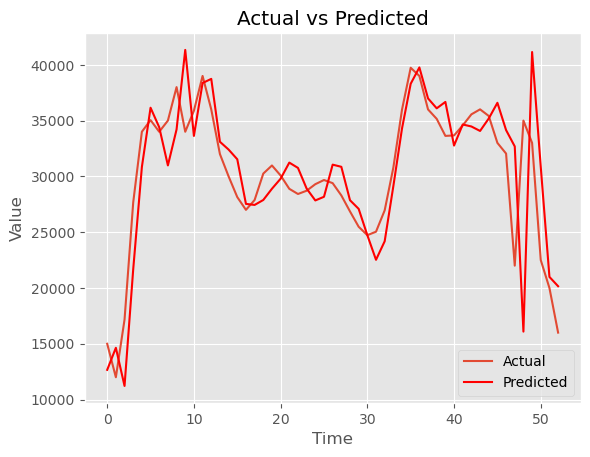

In [ ]:

# Splitting the data into train and test sets
X = Cow.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# Walk-forward validation
for t in range(len(test)):
    model = SARIMAX(history, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))  # Adjust seasonal_order as needed
    model_fit = model.fit(disp=False)  # Suppress optimization process details
    output = model_fit.forecast()
    yhat = output[0]
    obs = test[t]
    predictions.append(yhat)
    print('predicted=%f, expected=%f' % (yhat, obs))
    history.append(obs)

# Evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# Plot forecasts against actual outcomes
plt.plot(test, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(Cow, 
                                        order=(0, 1, 1), 
                                        seasonal_order=(0, 1, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.24876D+00    |proj g|=  1.52305D-01

At iterate    5    f=  8.21123D+00    |proj g|=  1.71550D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     14      1     0     0   6.622D-05   8.211D+00
  F =   8.2112225378526560     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------

 This problem is unconstrained.


In [ ]:
import statsmodels.api as sm

# Define the optimal parameters
optimal_order = (0, 1, 1)
optimal_seasonal_order = (0, 1, 1, 12)

# Create SARIMAX model with optimal parameters
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(Cow, 
                                        order=optimal_order, 
                                        seasonal_order=optimal_seasonal_order, 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()
print(output.summary().tables[1])


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.24876D+00    |proj g|=  1.52305D-01

At iterate    5    f=  8.21123D+00    |proj g|=  1.71550D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     14      1     0     0   6.622D-05   8.211D+00
  F =   8.2112225378526560     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------

 This problem is unconstrained.


In [ ]:
# Define the optimal parameters
optimal_order = (0, 1, 1)
optimal_seasonal_order = (0, 1, 1, 12)

# Create SARIMAX model with optimal parameters
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(Cow, 
                                        order=optimal_order, 
                                        seasonal_order=optimal_seasonal_order, 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model
output = ARIMA_MODEL.fit()

# Extract AIC value
AIC_value = output.aic

# Print in the desired format
print(f"ARIMA {optimal_order} x {optimal_seasonal_order}: AIC Calculated={AIC_value}")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.24876D+00    |proj g|=  1.52305D-01

At iterate    5    f=  8.21123D+00    |proj g|=  1.71550D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     14      1     0     0   6.622D-05   8.211D+00
  F =   8.2112225378526560     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 1, 1) x (0, 1, 1, 12): AIC Calculated=2535.0565416586182


 This problem is unconstrained.


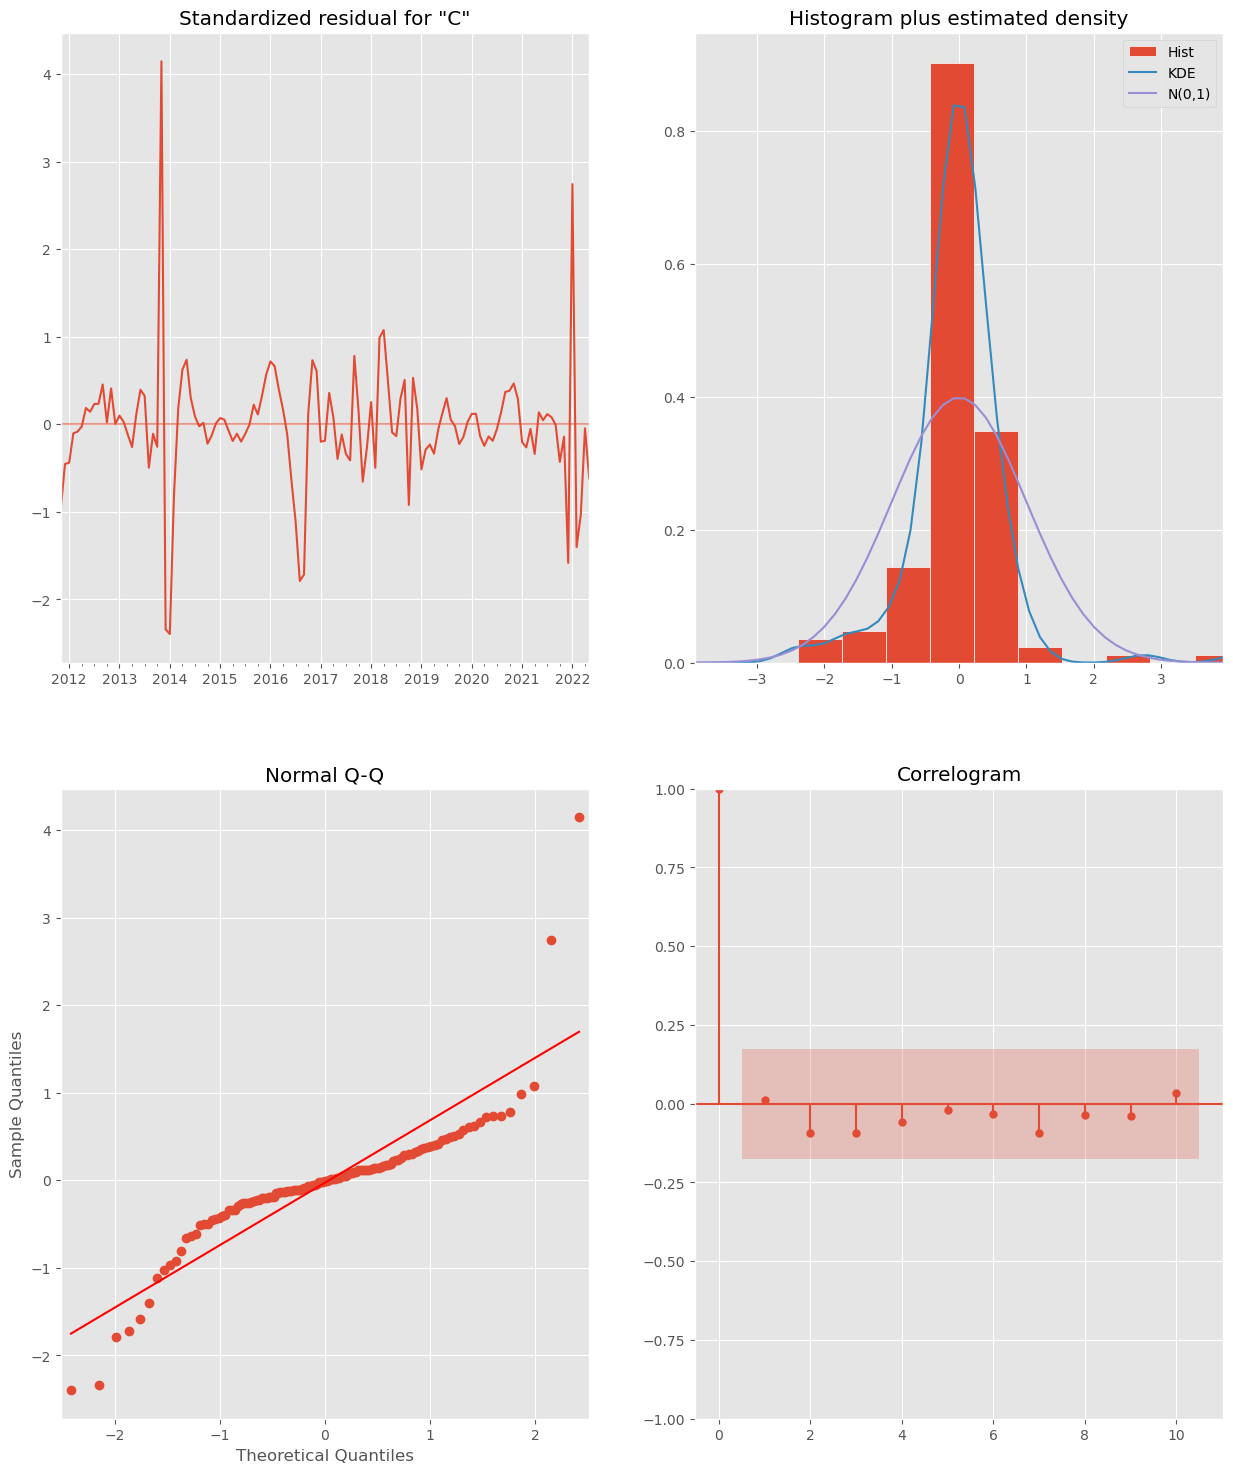

In [ ]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [ ]:
import arch


# Define the model
model = arch.arch_model(train, vol='GARCH', p=1, q=1)

# Fit the model
results = model.fit()

# View summary statistics
print(results.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1423.8711407425737
Iteration:      2,   Func. Count:     12,   Neg. LLF: 1073.3670834057843
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1063.9823328144687
Iteration:      4,   Func. Count:     23,   Neg. LLF: 1063.980376569866
Iteration:      5,   Func. Count:     28,   Neg. LLF: 1063.9794826600105
Iteration:      6,   Func. Count:     33,   Neg. LLF: 1063.9793569413716
Iteration:      7,   Func. Count:     38,   Neg. LLF: 1063.979351473659
Iteration:      8,   Func. Count:     42,   Neg. LLF: 1063.9793514737025
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1063.979351473659
            Iterations: 8
            Function evaluations: 42
            Gradient evaluations: 8
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-square

In [ ]:
# Assuming 'Dates' is the column containing the date information
df.set_index('Dates', inplace=True)


In [ ]:
import pandas as pd
import statsmodels.api as sm

def fit_sarima(data, order, seasonal_order):
    """
    Fit a SARIMA model to the data.

    Parameters:
    - data: Time series data (pandas DataFrame)
    - order: ARIMA order (p, d, q)
    - seasonal_order: SARIMA seasonal order (P, D, Q, m)

    Returns:
    - SARIMAXResultsWrapper: Fitted SARIMA model
    """
    models = {}
    for column in data.columns:
        mod = sm.tsa.statespace.SARIMAX(data[column], order=order, seasonal_order=seasonal_order,
                                        enforce_stationarity=False, enforce_invertibility=False)
        models[column] = mod.fit()
    return models

def forecast_sarima(models, steps):
    """
    Forecast future values using fitted SARIMA models.

    Parameters:
    - models: Dictionary of fitted SARIMA models
    - steps: Number of steps ahead to forecast

    Returns:
    - pandas DataFrame: Forecasted values for each variable
    """
    forecasts = {}
    for column, model in models.items():
        forecasts[column] = model.forecast(steps)
    return pd.DataFrame(forecasts)


In [ ]:
# Assuming 'data' is a pandas DataFrame with columns: 'Dates', 'Season', 'cow', 'steer', 'bulls', 'heifer'
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

models = fit_sarima(df[['Cow', 'Bull', 'Heifer','Steer']], order, seasonal_order)
forecasts = forecast_sarima(models, steps=10)
print(forecasts)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.29005D+00    |proj g|=  8.72683D-02

At iterate    5    f=  8.21060D+00    |proj g|=  5.12765D-03

At iterate   10    f=  8.21054D+00    |proj g|=  3.76408D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     17      1     0     0   6.018D-05   8.211D+00
  F =   8.2105408433873777     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.69649D+00    |proj g|=  1.25266D-01

At iterate    5    f=  8.60311D+00    |proj g|=  3.28802D-02

At iterate   10    f=  8.60000D+00    |proj g|=  3.44998D-02

At iterate   15    f=  8.59754D+00    |proj g|=  2.48132D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     31      1     0     0   3.764D-05   8.598D+00
  F =   8.5975359375733476     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  7.88649D+00    |proj g|=  7.46545D-03

At iterate   10    f=  7.88632D+00    |proj g|=  1.82108D-04

At iterate   15    f=  7.88632D+00    |proj g|=  9.36337D-04

At iterate   20    f=  7.88626D+00    |proj g|=  1.09504D-02

At iterate   25    f=  7.87926D+00    |proj g|=  1.00175D-01

At iterate   30    f=  7.81684D+00    |proj g|=  1.26350D-01

At iterate   35    f=  7.80755D+00    |proj g|=  2.08753D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     40      1     0     0   1.040D-06   7.808D+00
  F =   7.8075498499523253     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  8.42333D+00    |proj g|=  5.23368D-02

At iterate   10    f=  8.41629D+00    |proj g|=  2.96922D-02

At iterate   15    f=  8.41520D+00    |proj g|=  3.69253D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     21      1     0     0   3.693D-05   8.415D+00
  F =   8.4151991779755022     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
              Cow          Bull       Heifer         Steer
154  14508.240274  55590.143088  5823.780112  41517.863948
155  14691.131950  55715.548095  6892.404859  41396.670242
156  14215.849347  56193.119899  6876.207692  40262.839308
1

In [ ]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def fit_hw_seasonal(data, seasonal_periods):
    """
    Fit a Holt-Winters seasonal exponential smoothing model to the data.

    Parameters:
    - data: Time series data (pandas DataFrame)
    - seasonal_periods: Length of the seasonal cycle

    Returns:
    - dict: Fitted Holt-Winters models for each variable
    """
    models = {}
    for column in data.columns:
        model = ExponentialSmoothing(data[column], seasonal_periods=seasonal_periods, trend='add', seasonal='add')
        models[column] = model.fit()
    return models

def forecast_hw_seasonal(models, steps):
    """
    Forecast future values using fitted Holt-Winters seasonal models.

    Parameters:
    - models: Dictionary of fitted Holt-Winters models
    - steps: Number of steps ahead to forecast

    Returns:
    - pandas DataFrame: Forecasted values for each variable
    """
    forecasts = {}
    for column, model in models.items():
        forecasts[column] = model.forecast(steps)
    return pd.DataFrame(forecasts)


In [ ]:
# Assuming 'data' is a pandas DataFrame with columns: 'Dates', 'Season', 'cow', 'steer', 'bulls', 'heifer'
seasonal_periods = 12  # For example, if you have monthly data

models_hw = fit_hw_seasonal(df[['Cow', 'Bull', 'Heifer','Steer']], seasonal_periods)
forecasts_hw = forecast_hw_seasonal(models_hw, steps=10)
print(forecasts_hw)


              Cow          Bull       Heifer         Steer
154  16115.384380  58458.036253  5887.254075  39402.059069
155  16641.519242  64205.035264  7521.594094  38335.500854
156  13848.606775  59760.861237  4085.086114  35163.056454
157  10432.920045  57541.615964  1345.124637  33474.433580
158  11565.957903  56589.559521   859.782262  32560.995202
159  16706.685944  57597.251024  3396.570807  33241.044374
160  18070.295208  59035.773545  3053.520631  33236.231933
161  14927.300181  59943.241687  2704.015744  37954.430618
162  11456.857503  53926.415167  1711.779874  31310.642649
163  10353.842091  52576.399718  1202.962712  30130.679509


In [ ]:
# from statsmodels.tsa.vector_ar.var_model import VAR

# def fit_var(data, maxlags):
#     """
#     Fit a seasonal VAR model to the data.

#     Parameters:
#     - data: Time series data (pandas DataFrame)
#     - maxlags: Maximum number of lags for the VAR model

#     Returns:
#     - VARResults: Fitted VAR model
#     """
#     model = VAR(data)
#     return model.fit(maxlags=maxlags)

# def forecast_var(model, steps):
#     """
#     Forecast future values using a fitted VAR model.

#     Parameters:
#     - model: Fitted VAR model
#     - steps: Number of steps ahead to forecast

#     Returns:
#     - numpy array: Forecasted values
#     """
#     return model.forecast(model.y, steps)


In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR

def fit_var(data, maxlags):
    """
    Fit a VAR model to the data.

    Parameters:
    - data: Time series data (pandas DataFrame)
    - maxlags: Maximum number of lags for the VAR model

    Returns:
    - dict: Fitted VAR models for each variable
    """
    if not isinstance(data, pd.DataFrame):  # Check if data is a DataFrame
        raise ValueError("Input data must be a pandas DataFrame")
    
    if len(data.columns) < 2:
        raise ValueError("VAR model requires at least two variables for fitting")
    
    print("Input data columns:", data.columns)
    
    models = {}
    for column in data.columns:
        print("Current column:", column)
        print("Data for current column:", data[column])
        model = VAR(data[[column]])
        models[column] = model.fit(maxlags=maxlags)
    return models


In [ ]:
# Assuming 'df' is your DataFrame with columns: 'Cow', 'Steer', 'Bull', 'Heifer'
maxlags = 12  # Maximum number of lags for the VAR model

# Call the fit_var function
var_model = fit_var(df[['Cow', 'Steer', 'Bull', 'Heifer']], maxlags)

# Once fitted, you can use the resulting model for forecasting or analysis


In [ ]:
def fit_var(data, maxlags):
    """
    Fit a VAR model to the data.

    Parameters:
    - data: Time series data (pandas DataFrame)
    - maxlags: Maximum number of lags for the VAR model

    Returns:
    - VARResults: Fitted VAR model
    """
    if not isinstance(data, pd.DataFrame):  # Check if data is a DataFrame
        raise ValueError("Input data must be a pandas DataFrame")
    
    if len(data.columns) < 2:
        raise ValueError("VAR model requires at least two variables for fitting")
    
    model = VAR(data)
    return model.fit(maxlags=maxlags)


In [ ]:
def forecast_var(var_model, data, steps):
    """
    Forecast future values using a fitted VAR model.

    Parameters:
    - var_model: Fitted VAR model (VARResults object)
    - data: Time series data (pandas DataFrame) used for fitting the model
    - steps: Number of steps ahead to forecast

    Returns:
    - pandas DataFrame: Forecasted values for each variable
    """
    # Perform forecasting
    forecasted_data = var_model.forecast(data.values[-var_model.k_ar:], steps=steps)
    
    # Convert the forecasted values to a DataFrame with appropriate column names
    forecasted_df = pd.DataFrame(forecasted_data, columns=data.columns)
    
    return forecasted_df


In [ ]:
# Assuming 'df' is your DataFrame with columns: 'Cow', 'Steer', 'Bull', 'Heifer'
maxlags = 12  # Maximum number of lags for the VAR model

# Call the fit_var function
var_model = fit_var(df[['Cow', 'Steer', 'Bull', 'Heifer']], maxlags)

# Once fitted, you can use the resulting model for forecasting or analysis


In [ ]:
# 'maxlags' is defined as before
# 'var_model' is the fitted VAR model obtained from the fit_var function

# Specify the number of steps ahead to forecast
steps = 10

# Call the forecast_var function to obtain forecasts
forecasts = forecast_var(var_model, df[['Cow', 'Steer', 'Bull', 'Heifer']], steps)

# Print the forecasted values
print(forecasts)


            Cow         Steer          Bull        Heifer
0   5809.695692  22000.437410  39267.096899   2526.203686
1   7666.989811  23644.575196  48524.752845   3843.599116
2  17930.588639  29034.161363  38389.950353   5543.754537
3  16583.615314  35048.226692  37800.780334   6660.468426
4  25445.494370  40525.928201  50794.447110   8220.010189
5  21877.102390  32733.568584  48054.564784  11734.171592
6  28253.070100  40615.934553  50625.347837  17387.485463
7  27338.350306  41675.059190  53502.266371  18483.058025
8  28502.041246  46849.582775  63663.040467  20635.733853
9  32502.165892  43970.056589  58947.776671  21616.686243


In [ ]:
# Assuming you have your training and testing data prepared (X_train, y_train, X_test, y_test)

# Train a Random Forest model
rf_model, rf_predictions, rf_mse = train_ml_seasonal_model(X_train, y_train, X_test, y_test, model_type='random_forest', **kwargs)

# Train a Gradient Boosting model
gb_model, gb_predictions, gb_mse = train_ml_seasonal_model(X_train, y_train, X_test, y_test, model_type='gradient_boosting', **kwargs)


In [ ]:
df.head()

Seasons          Bull          Cow        Heifer         Steer
Dates                                                                     
2009-08-01  Drought   8500.000000   966.666667   1666.666667    766.666667
2009-09-01  Drought  18000.000000  4000.000000  15000.000000  13000.000000
2009-10-01  Drought   8500.000000  5000.000000   8000.000000   9000.000000
2009-11-01  Drought  12484.312740  4815.021851   5198.550137  11302.715033
2009-12-01      Wet  22166.666667  9477.777778  10111.111111  18222.222222

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def train_ml_seasonal_model(df, predictors, target_variables, model_type='random_forest', test_size=0.2, random_state=42, **kwargs):
    """
    Train a machine learning model to predict prices of multiple livestock.

    Parameters:
    - df: DataFrame containing the data, where the predictors and target variables are columns
    - predictors: List of column names containing the predictor variables
    - target_variables: List of column names containing the target variables (prices of livestock)
    - model_type: Type of machine learning model to use ('random_forest' or 'gradient_boosting')
    - test_size: Proportion of the dataset to include in the test split
    - random_state: Random seed for reproducibility
    - kwargs: Additional keyword arguments to pass to the model constructor

    Returns:
    - Trained machine learning model
    - Predictions on the test set for each target variable
    - Evaluation metric (e.g., Mean Squared Error) on the test set for each target variable
    """
    # Splitting the data into predictors (X) and target variables (y)
    X = df[predictors]
    y = df[target_variables]

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize the model
    if model_type == 'random_forest':
        model = RandomForestRegressor(**kwargs)
    elif model_type == 'gradient_boosting':
        model = GradientBoostingRegressor(**kwargs)
    else:
        raise ValueError("Invalid model_type. Choose 'random_forest' or 'gradient_boosting'.")

    # Train the model
    model.fit(X_train, y_train)

    # Predictions on the test set
    predictions = model.predict(X_test)

    # Evaluation metric
    mse = mean_squared_error(y_test, predictions, multioutput='raw_values')

    return model, predictions, mse


In [ ]:
# # Define the predictors and target variables
# predictors = ['Seasons']  # Add more predictors as needed
# target_variables = ['Bull', 'Cow', 'Heifer', 'Steer']

# # Train a Random Forest model
# rf_model, rf_predictions, rf_mse = train_ml_seasonal_model(df, predictors, target_variables, model_type='random_forest', random_state=42)


In [ ]:
# # Convert categorical variables to dummy variables (one-hot encoding)
# df = pd.get_dummies(df, columns=['Seasons'])

# # Define the predictors and target variables
# predictors = df.columns.tolist()
# predictors.remove('Bull')
# predictors.remove('Cow')
# predictors.remove('Heifer')
# predictors.remove('Steer')
# target_variables = ['Bull', 'Cow', 'Heifer', 'Steer']

# # Train a Random Forest model
# rf_model, rf_predictions, rf_mse = train_ml_seasonal_model(df, predictors, target_variables, model_type='random_forest', random_state=42)


In [ ]:
# Define the predictors and target variables
predictors = df.columns.tolist()
predictors.remove('Bull')
predictors.remove('Cow')
predictors.remove('Heifer')
predictors.remove('Steer')
target_variables = ['Bull', 'Cow', 'Heifer', 'Steer']

# Train a Random Forest model
rf_model, rf_predictions, rf_mse = train_ml_seasonal_model(df, predictors, target_variables, model_type='random_forest', random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def train_ml_seasonal_model(df, predictors, target_variables, model_type='random_forest', test_size=0.2, random_state=42, **kwargs):
    """
    Train a machine learning model to predict prices of multiple livestock.

    Parameters:
    - df: DataFrame containing the data, where the predictors and target variables are columns
    - predictors: List of column names containing the predictor variables
    - target_variables: List of column names containing the target variables (prices of livestock)
    - model_type: Type of machine learning model to use ('random_forest' or 'gradient_boosting')
    - test_size: Proportion of the dataset to include in the test split
    - random_state: Random seed for reproducibility
    - kwargs: Additional keyword arguments to pass to the model constructor

    Returns:
    - Trained machine learning model
    - Predictions on the test set for each target variable
    - Evaluation metric (e.g., Mean Squared Error) on the test set for each target variable
    """
    # Splitting the data into predictors (X) and target variables (y)
    X = df[predictors]
    y = df[target_variables]

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize the model
    if model_type == 'random_forest':
        model = RandomForestRegressor(**kwargs)
    elif model_type == 'gradient_boosting':
        model = GradientBoostingRegressor(**kwargs)
    else:
        raise ValueError("Invalid model_type. Choose 'random_forest' or 'gradient_boosting'.")

    # Train the model
    model.fit(X_train, y_train)

    # Predictions on the test set
    predictions = model.predict(X_test)

    # Evaluation metric
    mse = mean_squared_error(y_test, predictions, multioutput='raw_values')

    return model, predictions, mse


In [ ]:
# Train a Random Forest model
rf_model, rf_predictions, rf_mse = train_ml_seasonal_model(df, predictors, target_variables, model_type='random_forest', random_state=42)

# Print the predictions
print(rf_predictions)


[[55825.62661007 29652.40540541 25996.05206217 42784.35033158]
 [55825.62661007 29652.40540541 25996.05206217 42784.35033158]
 [55825.62661007 29652.40540541 25996.05206217 42784.35033158]
 [54356.4447894  29339.37074462 24582.15310509 41096.82736826]
 [54356.4447894  29339.37074462 24582.15310509 41096.82736826]
 [54356.4447894  29339.37074462 24582.15310509 41096.82736826]
 [55825.62661007 29652.40540541 25996.05206217 42784.35033158]
 [54356.4447894  29339.37074462 24582.15310509 41096.82736826]
 [48773.19875327 22638.26334117 18014.61539749 37717.14056031]
 [54356.4447894  29339.37074462 24582.15310509 41096.82736826]
 [55825.62661007 29652.40540541 25996.05206217 42784.35033158]
 [55825.62661007 29652.40540541 25996.05206217 42784.35033158]
 [54356.4447894  29339.37074462 24582.15310509 41096.82736826]
 [55825.62661007 29652.40540541 25996.05206217 42784.35033158]
 [48773.19875327 22638.26334117 18014.61539749 37717.14056031]
 [55825.62661007 29652.40540541 25996.05206217 42784.35